In [1]:
###########################################################################################
# plot

import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    'text.latex.preamble': r'\usepackage{amsmath}',
    'figure.dpi': 500,
    'axes.labelsize': 8,
    'xtick.direction': 'in',
    'xtick.labelsize': 6,
    'xtick.top': True,
    'xtick.major.width': 0.5,
    'ytick.direction': 'in',
    'ytick.labelsize': 6,
    'ytick.right': True,
    'ytick.major.width': 0.5,
    'legend.fontsize': 8,
    'axes.linewidth': 0.5,
    'axes.titlesize': 8,
    'grid.linewidth': 0.5,
    'font.size': 8
})

In [ ]:
#######################################################################
# plot flow configuration
import numpy as np
import fluidfoam as ff
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

x_mesh, y_mesh, z_mesh = ff.readmesh('../case-1/input/foam_base/')
y_mesh = np.reshape(y_mesh, (50, 50))
z_mesh = np.reshape(z_mesh, (50, 50))

print(np.shape(y_mesh))

x, y = np.meshgrid(np.linspace(-1, 1, 1001), np.linspace(-1, 1, 1001))

fig, ax = plt.subplots(figsize=(2, 2))
z = np.power(np.abs(
    (x - y) *
    (x + y)), 0.75) * np.power(np.abs(
        (x - 1) * (x + 1) * (y - 1) *
        (y + 1)), 1) * np.power(np.abs(x * y), 2)
print(z.min(), z.max())
numLevels = 3
levels = np.linspace(z.min() + (z.max() - z.min()) / numLevels,
                     z.max() - 0.5 * (z.max() - z.min()) / numLevels,
                     numLevels)
# cf = ax.contourf(x, y, z, levels=levels)
# symmetry axis
ax.plot([-1, 1], [-1, 1], '--', color='gray', linewidth=1)
ax.plot([1, -1], [-1, 1], '--', color='gray', linewidth=1)
ax.plot([1, -1], [0, 0], '--', color='gray', linewidth=1)
ax.plot([0, 0], [-1, 1], '--', color='gray', linewidth=1)
# boundaries
ax.axhline(y=-1, xmin=-1, xmax=1, color='black', linewidth=2)
ax.axhline(y=1, xmin=-1, xmax=1, color='black', linewidth=2)
ax.axvline(x=-1, ymin=-1, ymax=1, color='black', linewidth=2)
ax.axvline(x=1, ymin=-1, ymax=1, color='black', linewidth=2)
# vortex
ax.contour(x, y, z, levels=levels, colors='black', linewidths=0.75)
ax.set(aspect='equal')
ax.axis('off')

# patch
ax.add_patch(Rectangle((-1, -1), 1, 1, color='gray', linewidth=0, alpha=0.25))

plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.savefig('contour.png')

# plot mesh
ax.plot(y_mesh - 1, z_mesh - 1, color='black', linewidth=0.1)
ax.plot(y_mesh.transpose() - 1,
        z_mesh.transpose() - 1,
        color='black',
        linewidth=0.1)
ax.set(xlim=(-1, y_mesh.max() - 1), ylim=(-1, z_mesh.max() - 1))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
ax.text(-0.55, -1.075, 'wall', fontsize=6)
ax.text(-1.075, -0.55, 'wall', rotation=90, fontsize=6)
ax.text(-0.65, 0, 'symmetry', fontsize=6)
ax.text(0, -0.65, 'symmetry', rotation=90, fontsize=6)
plt.savefig('contour-part.png')
plt.close()

Reading file ../case-1/results_ensemble/sample_50/constant/polyMesh/owner
Reading file ../case-1/results_ensemble/sample_50/constant/polyMesh/faces
Reading file ../case-1/results_ensemble/sample_50/constant/polyMesh/points
Reading file ../case-1/results_ensemble/sample_50/constant/polyMesh/neighbour
Reading file ../case-1/results_ensemble/sample_50\100\U
Reading file ../case-1/input/data/foam_synthetic_truth/10000\U
Reading file ../SR-run/run-2/1\U
baselin model Ux min max 0.000968422 1.32069
learned model Ux min max 0.000940639 1.32315
symbols model Ux min max 0.000965974 1.31974
baselin model Uy min max -0.00130472 0.00181727
learned model Uy min max -0.00129902 0.00181287
symbols model Uy min max -0.0013035 0.00179385
baselin model Uz min max -0.00130472 0.00181727
learned model Uz min max -0.00129902 0.00181287
symbols model Uz min max -0.0013035 0.00179385
Ux error learned min max 7.571799589826195e-07 0.0027402342714792902
Ux error symboli min max 0.0 0.0007776238178527893
Uy err

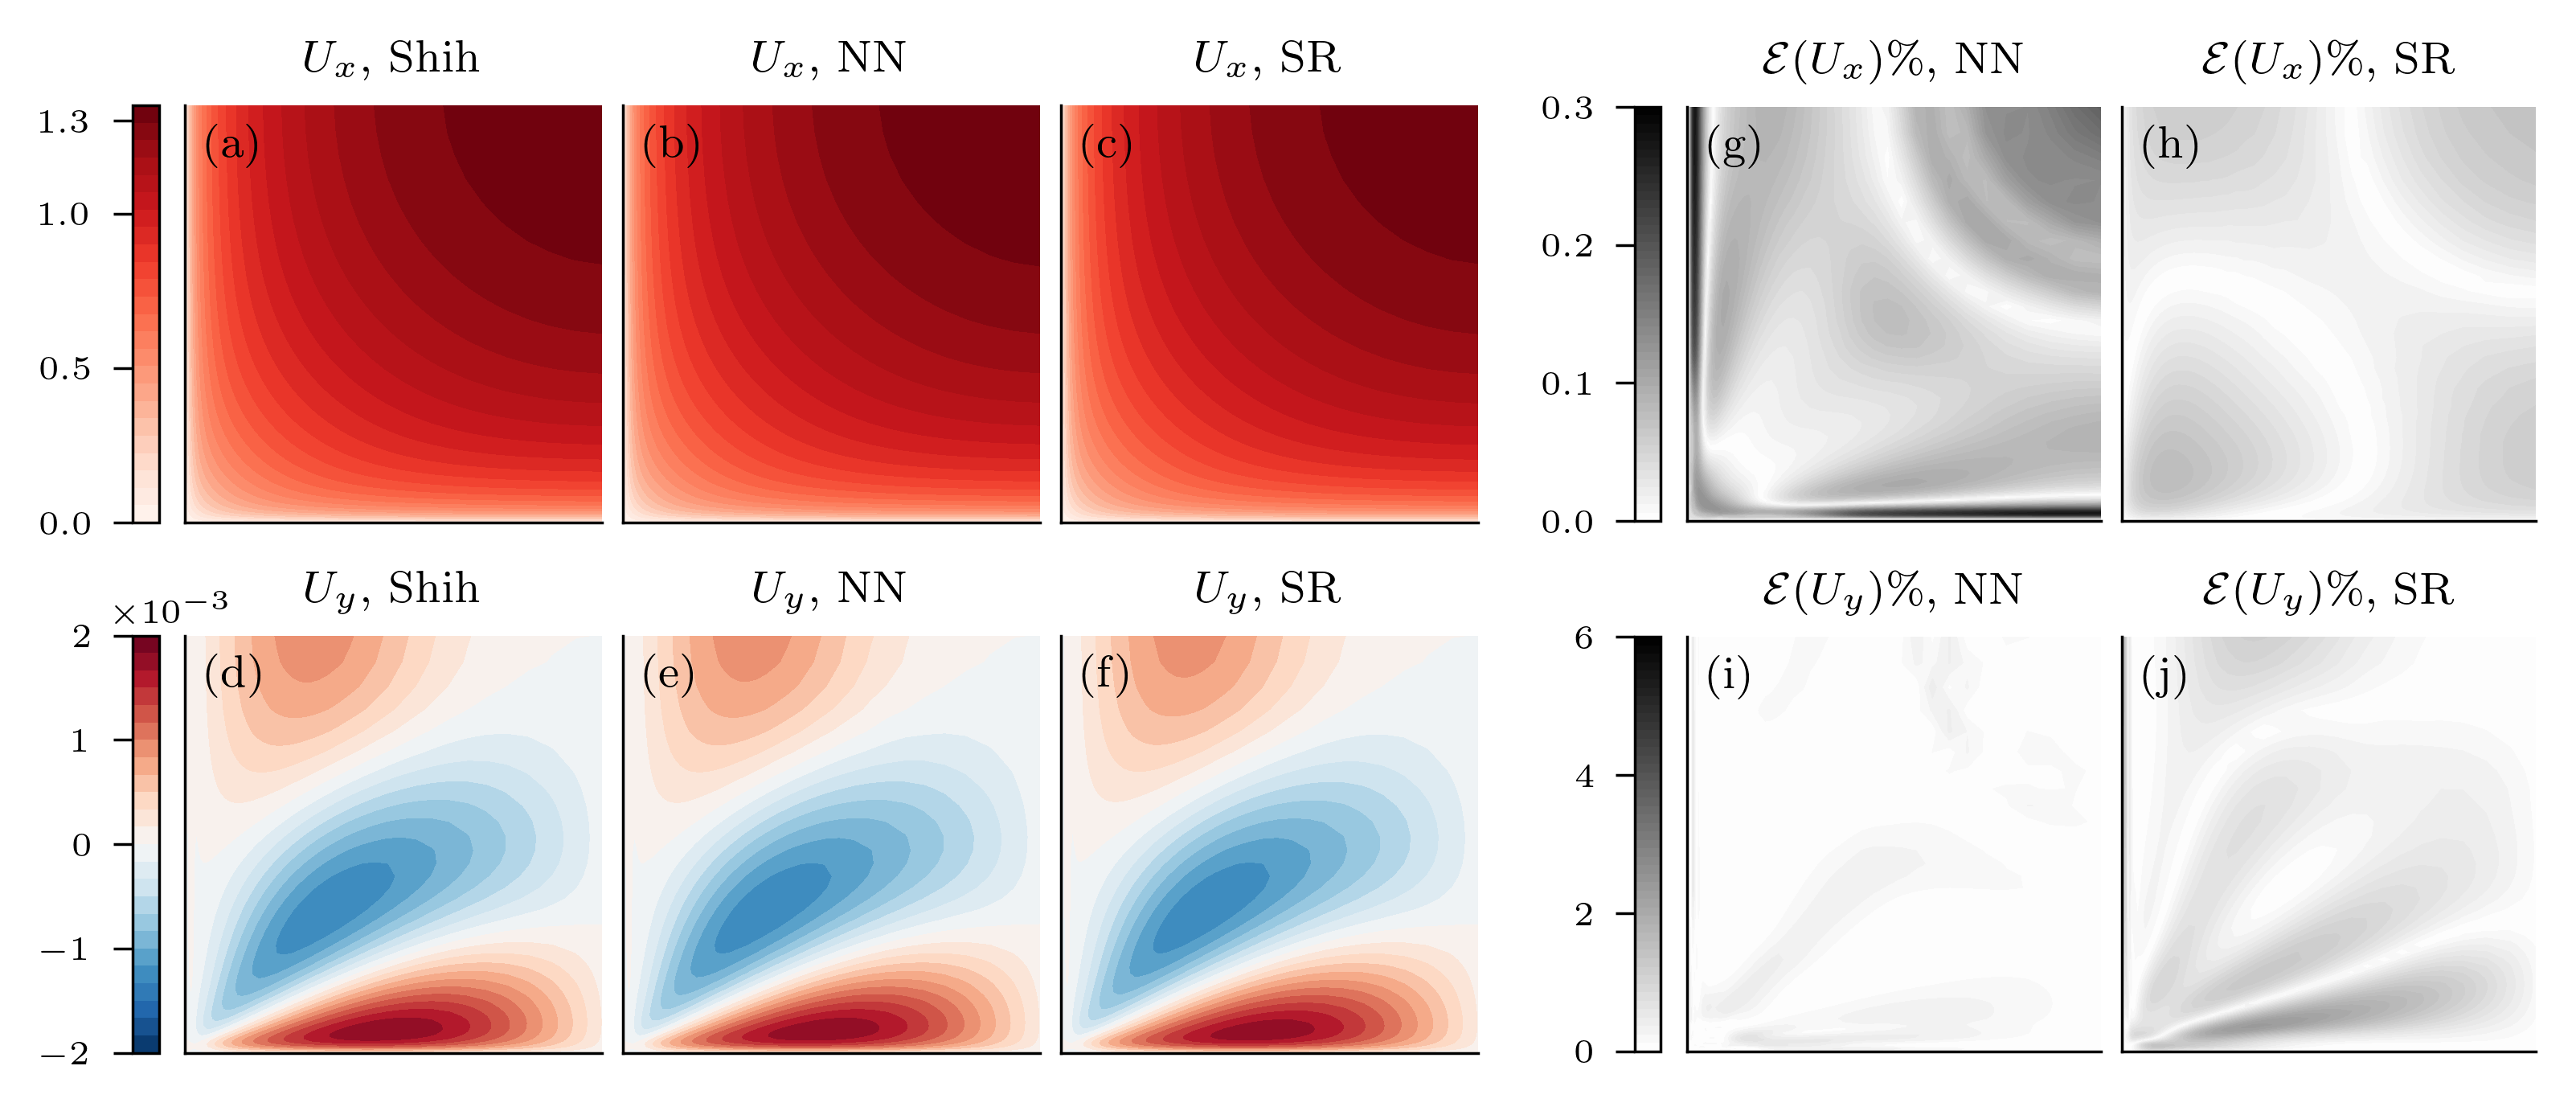

In [2]:
import numpy as np
import fluidfoam as ff
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# load data ############################################################################
caseDir = '../case-1/results_ensemble/sample_50'
baseDir = '../case-1/input/data/foam_synthetic_truth/'
symbDir = '../SR-run/run-2/'

x_, y_, z_ = ff.readmesh(caseDir)
y_mesh = np.reshape(y_, (50, 50))
z_mesh = np.reshape(z_, (50, 50))

U_ = ff.readvector(caseDir, '100', 'U')
Ux_learned = np.reshape(U_[0, :], (50, 50))
Uy_learned = np.reshape(U_[1, :], (50, 50))
Uz_learned = np.reshape(U_[2, :], (50, 50))

U_ = ff.readvector(baseDir, '10000', 'U')
Ux_base = np.reshape(U_[0, :], (50, 50))
Uy_base = np.reshape(U_[1, :], (50, 50))
Uz_base = np.reshape(U_[2, :], (50, 50))

U_ = ff.readvector(symbDir, '1', 'U')
Ux_symb = np.reshape(U_[0, :], (50, 50))
Uy_symb = np.reshape(U_[1, :], (50, 50))
Uz_symb = np.reshape(U_[2, :], (50, 50))

print('baselin model Ux min max', Ux_base.min(), Ux_base.max())
print('learned model Ux min max', Ux_learned.min(), Ux_learned.max())
print('symbols model Ux min max', Ux_symb.min(), Ux_symb.max())

print('baselin model Uy min max', Uy_base.min(), Uy_base.max())
print('learned model Uy min max', Uy_learned.min(), Uy_learned.max())
print('symbols model Uy min max', Uy_symb.min(), Uy_symb.max())

print('baselin model Uz min max', Uz_base.min(), Uz_base.max())
print('learned model Uz min max', Uz_learned.min(), Uz_learned.max())
print('symbols model Uz min max', Uz_symb.min(), Uz_symb.max())

error_x_learned = np.abs(Ux_learned - Ux_base) / np.max(np.abs(Ux_base))
error_y_learned = np.abs(Uy_learned - Uy_base) / np.max(np.abs(Uy_base))
error_x_symb = np.abs(Ux_symb - Ux_base) / np.max(np.abs(Ux_base))
error_y_symb = np.abs(Uy_symb - Uy_base) / np.max(np.abs(Uy_base))
print('Ux error learned min max', np.min(error_x_learned),
      np.max(error_x_learned))
print('Ux error symboli min max', np.min(error_x_symb), np.max(error_x_symb))
print('Uy error learned min max', np.min(error_y_learned),
      np.max(error_y_learned))
print('Uy error symboli min max', np.min(error_y_symb), np.max(error_y_symb))

# arange grid and subplots #############################################################
fig = plt.figure(figsize=(6.5, 2.6))
gs1 = GridSpec(2,
               3,
               left=0.075,
               right=0.57,
               bottom=0.01,
               top=0.94,
               wspace=0.05)
gs2 = GridSpec(2,
               2,
               left=0.65,
               right=0.975,
               bottom=0.01,
               top=0.94,
               wspace=0.05)
ax = []
ex = []
for i in range(2):
    ax.append([])
    for j in range(3):
        ax[i].append(fig.add_subplot(gs1[i, j]))
for i in range(2):
    ex.append([])
    for j in range(2):
        ex[i].append(fig.add_subplot(gs2[i, j]))

# plot ##################################################################################
levels_Ux = np.linspace(0, 1.35, 25)
levels_Uy = np.linspace(-0.002, 0.002, 25)
a00 = ax[0][0].contourf(y_mesh, z_mesh, Ux_base, levels=levels_Ux, cmap='Reds')
a01 = ax[0][1].contourf(y_mesh,
                        z_mesh,
                        Ux_learned,
                        levels=levels_Ux,
                        cmap='Reds')
a02 = ax[0][2].contourf(y_mesh, z_mesh, Ux_symb, levels=levels_Ux, cmap='Reds')

a10 = ax[1][0].contourf(y_mesh,
                        z_mesh,
                        Uy_base,
                        levels=levels_Uy,
                        cmap='RdBu_r')
a11 = ax[1][1].contourf(y_mesh,
                        z_mesh,
                        Uy_learned,
                        levels=levels_Uy,
                        cmap='RdBu_r')
a12 = ax[1][2].contourf(y_mesh,
                        z_mesh,
                        Uy_symb,
                        levels=levels_Uy,
                        cmap='RdBu_r')

levels_error_x = np.linspace(0, 0.3, 50)
levels_error_y = np.linspace(0, 6, 50)
e00 = ex[0][0].contourf(y_mesh,
                        z_mesh,
                        1.e2 * error_x_learned,
                        levels=levels_error_x,
                        cmap='gray_r')
e01 = ex[0][1].contourf(y_mesh,
                        z_mesh,
                        1.e2 * error_x_symb,
                        levels=levels_error_x,
                        cmap='gray_r')
e10 = ex[1][0].contourf(y_mesh,
                        z_mesh,
                        1.e2 * error_y_learned,
                        levels=levels_error_y,
                        cmap='gray_r')
e11 = ex[1][1].contourf(y_mesh,
                        z_mesh,
                        1.e2 * error_y_symb,
                        levels=levels_error_y,
                        cmap='gray_r')
# cmap='gray_r')
# set ###################################################################################
for i in range(2):
    for j in range(3):
        ax[i][j].set(aspect='equal', xticks=([]), yticks=([]))
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)
    for k in range(2):
        ex[i][k].set(aspect='equal', xticks=([]), yticks=([]))
        ex[i][k].spines['top'].set_visible(False)
        ex[i][k].spines['right'].set_visible(False)
ax[0][0].set(title=r'$U_x,\,\text{Shih}$')
ax[0][1].set(title=r'$U_x,\,\text{NN}$')
ax[0][2].set(title=r'$U_x,\,\text{SR}$')
ax[1][0].set(title=r'$U_y,\,\text{Shih}$')
ax[1][1].set(title=r'$U_y,\,\text{NN}$')
ax[1][2].set(title=r'$U_y,\,\text{SR}$')

ax[0][0].text(0.05, 0.85, r'$\text{(a)}$')
ax[0][1].text(0.05, 0.85, r'$\text{(b)}$')
ax[0][2].text(0.05, 0.85, r'$\text{(c)}$')
ax[1][0].text(0.05, 0.85, r'$\text{(d)}$')
ax[1][1].text(0.05, 0.85, r'$\text{(e)}$')
ax[1][2].text(0.05, 0.85, r'$\text{(f)}$')
ex[0][0].text(0.05, 0.85, r'$\text{(g)}$')
ex[0][1].text(0.05, 0.85, r'$\text{(h)}$')
ex[1][0].text(0.05, 0.85, r'$\text{(i)}$')
ex[1][1].text(0.05, 0.85, r'$\text{(j)}$')

ex[0][0].set(title=r'$\mathcal{E}(U_x)\%,\,\text{NN}$')
ex[0][1].set(title=r'$\mathcal{E}(U_x)\%,\,\text{SR}$')
ex[1][0].set(title=r'$\mathcal{E}(U_y)\%,\,\text{NN}$')
ex[1][1].set(title=r'$\mathcal{E}(U_y)\%,\,\text{SR}$')

# cbar ###########################################################################
# cbar Ux
ax00_pos = ax[0][0].get_position()
cb_a00_ax = fig.add_axes(
    [ax00_pos.x0 - 0.02, ax00_pos.y0, 0.01, ax00_pos.y1 - ax00_pos.y0])
cb_a00 = plt.colorbar(a00, cax=cb_a00_ax, orientation='vertical')
cb_a00.ax.set_yticks([0, 0.5, 1, 1.3])
cb_a00.ax.tick_params(axis='y',
                      direction='out',
                      left=True,
                      right=False,
                      labelleft=True,
                      labelright=False)
cb_a00.ax.ticklabel_format(style='sci', scilimits=(0, 0))
# cbar Uy
ax10_pos = ax[1][0].get_position()
cb_a10_ax = fig.add_axes(
    [ax10_pos.x0 - 0.02, ax10_pos.y0, 0.01, ax10_pos.y1 - ax10_pos.y0])
cb_a10 = plt.colorbar(a10, cax=cb_a10_ax, orientation='vertical')
cb_a10.ax.set_yticks([-0.002, -0.001, 0, 0.001, 0.002])
cb_a10.ax.tick_params(axis='y',
                      direction='out',
                      left=True,
                      right=False,
                      labelleft=True,
                      labelright=False)
cb_a10.ax.ticklabel_format(style='sci', scilimits=(0, 0))
cb_a10.ax.yaxis.get_offset_text().set_x(4)
# cbar error Ux
ex00_pos = ex[0][0].get_position()
cb_e00_ex = fig.add_axes(
    [ex00_pos.x0 - 0.02, ex00_pos.y0, 0.01, ex00_pos.y1 - ex00_pos.y0])
cb_e00 = plt.colorbar(e00, cax=cb_e00_ex, orientation='vertical')
cb_e00.ax.set_yticks([0, 0.1, 0.2, 0.3])
cb_e00.ax.tick_params(axis='y',
                      direction='out',
                      left=True,
                      right=False,
                      labelleft=True,
                      labelright=False)
# cb_e00.ax.ticklabel_format(style='sci', scilimits=(-1, 0))
# cbar error Uy
ex10_pos = ex[1][0].get_position()
cb_e10_ex = fig.add_axes(
    [ex10_pos.x0 - 0.02, ex10_pos.y0, 0.01, ex10_pos.y1 - ex10_pos.y0])
cb_e10 = plt.colorbar(e11, cax=cb_e10_ex, orientation='vertical')
cb_e10.ax.set_yticks([0, 2, 4, 6])
cb_e10.ax.tick_params(axis='y',
                      direction='out',
                      left=True,
                      right=False,
                      labelleft=True,
                      labelright=False)
# cb_e00.ax.ticklabel_format(style='sci', scilimits=(-1, 0))

plt.savefig('duct-flow-U.png')

Reading file ../case-1/results_ensemble/sample_50/constant/polyMesh/owner
Reading file ../case-1/results_ensemble/sample_50/constant/polyMesh/faces
Reading file ../case-1/results_ensemble/sample_50/constant/polyMesh/points
Reading file ../case-1/results_ensemble/sample_50/constant/polyMesh/neighbour
Reading file ../case-1/results_ensemble/sample_50\100\U
Reading file ../case-1/input/data/foam_synthetic_truth/10000\U
Reading file ../SR-run/run-2/1\U
Reading file ../SR-Direct-run/run-2/1\U
Shih   model Ux min max 0.000968422 1.32069
NN     model Ux min max 0.000940639 1.32315
SR+PFI model Ux min max 0.000965974 1.31974
SR-PFI model Ux min max 0.000935358 1.32411
Shih   model Uy min max -0.00130472 0.00181727
NN     model Uy min max -0.00129902 0.00181287
SR+PFI model Uy min max -0.0013035 0.00179385
SR-PFI model Uy min max -0.00130809 0.00182202
Shih   model Uz min max -0.00130472 0.00181727
NN     model Uz min max -0.00129902 0.00181287
SR+PFI model Uz min max -0.0013035 0.00179385
SR-P

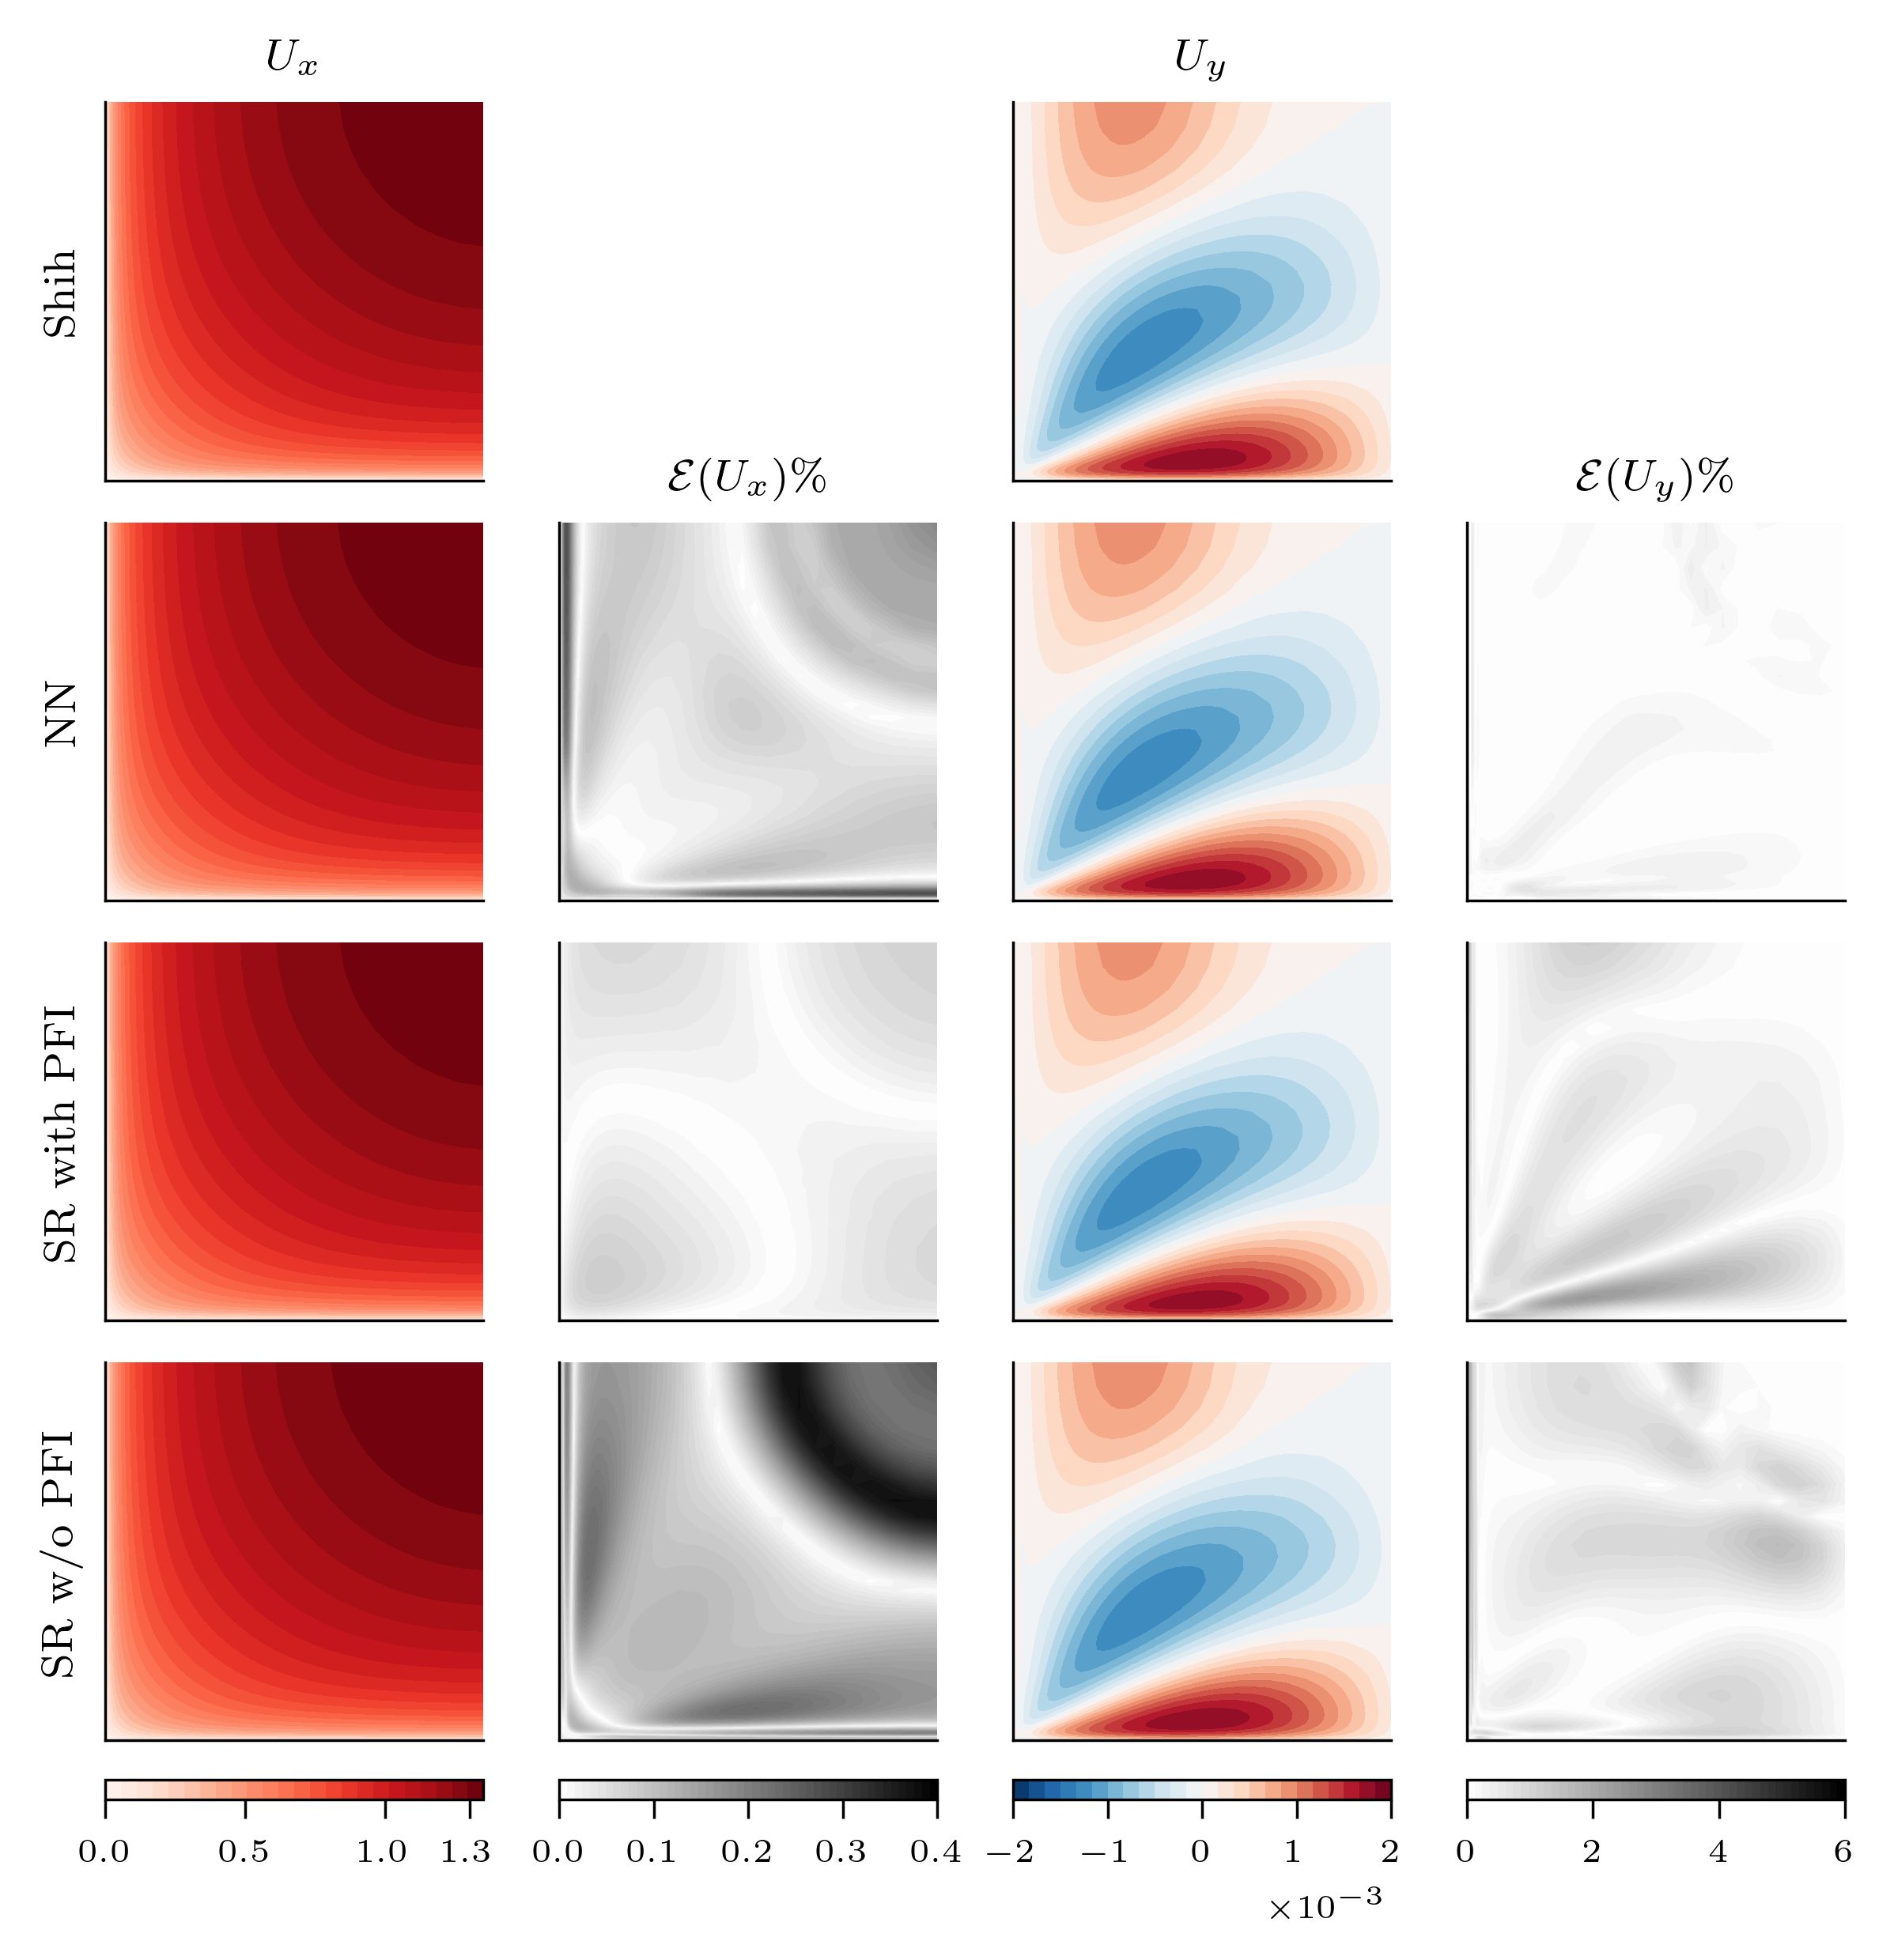

In [3]:
import numpy as np
import fluidfoam as ff
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# load data ############################################################################
caseDir = '../case-1/results_ensemble/sample_50'
baseDir = '../case-1/input/data/foam_synthetic_truth/'
SR_Dir = '../SR-run/run-2/'
SR0_Dir = '../SR-Direct-run/run-2/'

x_, y_, z_ = ff.readmesh(caseDir)
y_mesh = np.reshape(y_, (50, 50))
z_mesh = np.reshape(z_, (50, 50))

U_ = ff.readvector(caseDir, '100', 'U')
Ux_NN = np.reshape(U_[0, :], (50, 50))
Uy_NN = np.reshape(U_[1, :], (50, 50))
Uz_NN = np.reshape(U_[2, :], (50, 50))

U_ = ff.readvector(baseDir, '10000', 'U')
Ux_base = np.reshape(U_[0, :], (50, 50))
Uy_base = np.reshape(U_[1, :], (50, 50))
Uz_base = np.reshape(U_[2, :], (50, 50))

U_ = ff.readvector(SR_Dir, '1', 'U')
Ux_SR = np.reshape(U_[0, :], (50, 50))
Uy_SR = np.reshape(U_[1, :], (50, 50))
Uz_SR = np.reshape(U_[2, :], (50, 50))

U_ = ff.readvector(SR0_Dir, '1', 'U')
Ux_SR0 = np.reshape(U_[0, :], (50, 50))
Uy_SR0 = np.reshape(U_[1, :], (50, 50))
Uz_SR0 = np.reshape(U_[2, :], (50, 50))

print('Shih   model Ux min max', Ux_base.min(), Ux_base.max())
print('NN     model Ux min max', Ux_NN.min(), Ux_NN.max())
print('SR+PFI model Ux min max', Ux_SR.min(), Ux_SR.max())
print('SR-PFI model Ux min max', Ux_SR0.min(), Ux_SR0.max())

print('Shih   model Uy min max', Uy_base.min(), Uy_base.max())
print('NN     model Uy min max', Uy_NN.min(), Uy_NN.max())
print('SR+PFI model Uy min max', Uy_SR.min(), Uy_SR.max())
print('SR-PFI model Uy min max', Uy_SR0.min(), Uy_SR0.max())

print('Shih   model Uz min max', Uz_base.min(), Uz_base.max())
print('NN     model Uz min max', Uz_NN.min(), Uz_NN.max())
print('SR+PFI model Uz min max', Uz_SR.min(), Uz_SR.max())
print('SR-PFI model Uz min max', Uz_SR0.min(), Uz_SR0.max())

error_x_NN = np.abs(Ux_NN - Ux_base) / np.max(np.abs(Ux_base))
error_x_SR = np.abs(Ux_SR - Ux_base) / np.max(np.abs(Ux_base))
error_x_SR0 = np.abs(Ux_SR0 - Ux_base) / np.max(np.abs(Ux_base))
error_y_NN = np.abs(Uy_NN - Uy_base) / np.max(np.abs(Uy_base))
error_y_SR = np.abs(Uy_SR - Uy_base) / np.max(np.abs(Uy_base))
error_y_SR0 = np.abs(Uy_SR0 - Uy_base) / np.max(np.abs(Uy_base))
U_mag_base = np.sqrt(np.power(Ux_base, 2) + np.power(Uy_base, 2))
error_NN = np.sqrt(
    np.power(Ux_NN - Ux_base, 2) +
    np.power(Uy_NN - Uy_base, 2)) / np.max(U_mag_base)
error_SR = np.sqrt(
    np.power(Ux_SR - Ux_base, 2) +
    np.power(Uy_SR - Uy_base, 2)) / np.max(U_mag_base)
error_SR0 = np.sqrt(
    np.power(Ux_SR0 - Ux_base, 2) +
    np.power(Uy_SR0 - Uy_base, 2)) / np.max(U_mag_base)
print('Ux error NN min max', np.min(error_x_NN), np.max(error_x_NN))
print('Ux error SR min max', np.min(error_x_SR), np.max(error_x_SR))
print('UX error SR0 min max', np.min(error_x_SR0), np.max(error_x_SR0))
print('Uy error NN min max', np.min(error_y_NN), np.max(error_y_NN))
print('Uy error SR min max', np.min(error_y_SR), np.max(error_y_SR))
print('Uy error SR0 min max', np.min(error_y_SR0), np.max(error_y_SR0))
print('U mag error NN min max mean %.6e,%.6e,%.6e' %
      (np.min(error_NN), np.max(error_NN), np.mean(error_NN)))
print('U mag error SR min max mean %.6e,%.6e,%.6e' %
      (np.min(error_SR), np.max(error_SR), np.mean(error_SR)))
print('U mag error SR0 min max mean %.6e, %.6e, %.6e' %
      (np.min(error_SR0), np.max(error_SR0), np.mean(error_SR0)))

# arange grid and subplots #############################################################
fig, ax = plt.subplots(4, 4, figsize=(5.5, 5))

# plot ##################################################################################
levels_Ux = np.linspace(0, 1.35, 25)
levels_Uy = np.linspace(-0.002, 0.002, 25)
levels_error_x = np.linspace(0, 0.4, 50)
levels_error_y = np.linspace(0, 6, 50)
# Ux
a00 = ax[0][0].contourf(y_mesh, z_mesh, Ux_base, levels=levels_Ux, cmap='Reds')
a19 = ax[1][0].contourf(y_mesh, z_mesh, Ux_NN, levels=levels_Ux, cmap='Reds')
a20 = ax[2][0].contourf(y_mesh, z_mesh, Ux_SR, levels=levels_Ux, cmap='Reds')
a30 = ax[3][0].contourf(y_mesh, z_mesh, Ux_SR0, levels=levels_Ux, cmap='Reds')

# error Ux
a11 = ax[1][1].contourf(y_mesh,
                        z_mesh,
                        1.e2 * error_x_NN,
                        levels=levels_error_x,
                        cmap='gray_r')
a21 = ax[2][1].contourf(y_mesh,
                        z_mesh,
                        1.e2 * error_x_SR,
                        levels=levels_error_x,
                        cmap='gray_r')
a31 = ax[3][1].contourf(y_mesh,
                        z_mesh,
                        1.e2 * error_x_SR0,
                        levels=levels_error_x,
                        cmap='gray_r')

# Uy
a02 = ax[0][2].contourf(y_mesh,
                        z_mesh,
                        Uy_base,
                        levels=levels_Uy,
                        cmap='RdBu_r')
a12 = ax[1][2].contourf(y_mesh, z_mesh, Uy_NN, levels=levels_Uy, cmap='RdBu_r')
a22 = ax[2][2].contourf(y_mesh, z_mesh, Uy_SR, levels=levels_Uy, cmap='RdBu_r')
a32 = ax[3][2].contourf(y_mesh,
                        z_mesh,
                        Uy_SR0,
                        levels=levels_Uy,
                        cmap='RdBu_r')

# error Uy
a13 = ax[1][3].contourf(y_mesh,
                        z_mesh,
                        1.e2 * error_y_NN,
                        levels=levels_error_y,
                        cmap='gray_r')
a23 = ax[2][3].contourf(y_mesh,
                        z_mesh,
                        1.e2 * error_y_SR,
                        levels=levels_error_y,
                        cmap='gray_r')
a33 = ax[3][3].contourf(y_mesh,
                        z_mesh,
                        1.e2 * error_y_SR0,
                        levels=levels_error_y,
                        cmap='gray_r')
# set ###################################################################################
for i in range(4):
    for j in range(4):
        ax[i][j].set(aspect='equal', xticks=([]), yticks=([]))
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)
ax[0][1].spines[['bottom', 'left']].set_visible(False)
ax[0][3].spines[['bottom', 'left']].set_visible(False)

ax[0][0].set(ylabel=r'Shih')
ax[1][0].set(ylabel=r'NN')
ax[2][0].set(ylabel=r'SR with PFI')
ax[3][0].set(ylabel=r'SR w/o PFI')

ax[0][0].set_title(r'$U_x$')
ax[0][2].set_title(r'$U_y$')
ax[1][1].set_title(r'$\mathcal{E}(U_x)\%$')
ax[1][3].set_title(r'$\mathcal{E}(U_y)\%$')

plt.subplots_adjust(hspace=0.0, left=0.1, right=0.9, bottom=0.1, top=0.95)
# cbar ###########################################################################
# cbar Ux
ax30_pos = ax[3][0].get_position()
cb_a30_ax = fig.add_axes(
    [ax30_pos.x0, ax30_pos.y0 - 0.03, ax30_pos.x1 - ax30_pos.x0, 0.01])
cb_a00 = plt.colorbar(a00, cax=cb_a30_ax, orientation='horizontal')
cb_a00.ax.set_xticks([0, 0.5, 1, 1.3])
cb_a00.ax.ticklabel_format(style='sci', scilimits=(0, 0))
cb_a00.ax.tick_params(axis='x', direction='out')
# cbar error Ux
ax31_pos = ax[3][1].get_position()
cb_a31_ax = fig.add_axes(
    [ax31_pos.x0, ax31_pos.y0 - 0.03, ax31_pos.x1 - ax31_pos.x0, 0.01])
cb_a10 = plt.colorbar(a31, cax=cb_a31_ax, orientation='horizontal')
cb_a10.ax.set_xticks([0, 0.1, 0.2, 0.3, 0.4])
cb_a10.ax.tick_params(axis='x', direction='out')
# cbar Uy
ax32_pos = ax[3][2].get_position()
cb_a32_ax = fig.add_axes(
    [ax32_pos.x0, ax32_pos.y0 - 0.03, ax32_pos.x1 - ax32_pos.x0, 0.01])
cb_a20 = plt.colorbar(a02, cax=cb_a32_ax, orientation='horizontal')
cb_a20.ax.set_xticks([-0.002, -0.001, 0, 0.001, 0.002])
cb_a20.ax.ticklabel_format(style='sci', scilimits=(0, 0))
cb_a20.ax.tick_params(axis='x', direction='out')
# cb_a20.ax.xaxis.get_offset_text().set_x(1)

# cbar error Uy
ax33_pos = ax[3][3].get_position()
cb_a33_ax = fig.add_axes(
    [ax33_pos.x0, ax33_pos.y0 - 0.03, ax33_pos.x1 - ax33_pos.x0, 0.01])
cb_a30 = plt.colorbar(a13, cax=cb_a33_ax, orientation='horizontal')
cb_a30.ax.set_xticks([0, 2, 4, 6])
cb_a30.ax.tick_params(axis='x', direction='out')
# cb_a30.ax.tick_params(axis='y', direction='out', right=True, labelright=True)

plt.savefig('duct-flow-U-new.png')

In [ ]:
import numpy as np
import os
import fluidfoam as ff
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# function tools #######################################################################


def getReynoldsStress(gradU, g1, g2, g3, g4, tke, timeScale):
    gradU_tran = np.transpose(gradU, (1, 0, 2))
    IM = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    S = timeScale * 0.5 * (gradU + gradU_tran)
    W = timeScale * 0.5 * (gradU - gradU_tran)
    T1 = S
    T2 = np.zeros_like(S)
    T3 = np.zeros_like(S)
    T4 = np.zeros_like(S)
    b = np.zeros_like(S)
    R = np.zeros_like(S)
    for i in range(np.shape(S)[2]):
        T2[:, :, i] = S[:, :, i] @ W[:, :, i] - W[:, :, i] @ S[:, :, i]

        T3[:, :, i] = S[:, :, i] @ S[:, :, i]
        thirdTrace = np.trace(T3[:, :, i]) / 3.0
        T3[:, :, i] -= thirdTrace * IM

        T4[:, :, i] = W[:, :, i] @ W[:, :, i]
        thirdTrace = np.trace(T4[:, :, i]) / 3.0
        T4[:, :, i] -= thirdTrace * IM

    for i in range(np.shape(S)[2]):
        b[:, :, i] = g1[i] * T1[:, :, i] + g2[i] * T2[:, :, i] + g3[
            i] * T3[:, :, i] + g4[i] * T4[:, :, i]
        R[:, :, i] = 2 * tke[i] * b[:, :, i] + tke[i] * 2.0 / 3.0 * IM

    return np.reshape(R, (3, 3, 50, 50), order='F')


# shih_quadratic model: theta > g function
def shih_quadratic(theta):
    nbasis_tensors = 4

    def g1(theta):
        num = -2. / 3.
        denom = 1.25 + np.sqrt(
            2 * theta[:, 0]) + 0.9 * np.sqrt(-2 * theta[:, 1])
        return num / denom

    def g234(theta, coeff):
        return coeff / (1000. + (2 * theta[:, 0])**(3. / 2.))

    g = np.empty([len(theta), nbasis_tensors])
    g[:, 0] = g1(theta)
    for i, c in enumerate([7.5, 1.5, -9.5]):
        g[:, i + 1] = g234(theta, c)
    return g


def _get_b(g, T):
    return np.sum(np.expand_dims(g, 1) * T, axis=-1)


def b2a(b, k):
    return 2 * np.expand_dims(np.squeeze(k), -1) * b


# load data ############################################################################
# Shih
data_dir = '../case-1/input/data'
nscalar_invariants = 2
ncells = 2500
nbasis_tensors = 4
VECTORDIM = 3
theta_t = np.load(os.path.join(
    data_dir, 'scalar_invariants.npy'))[:, :nscalar_invariants]
g_t = shih_quadratic(theta_t)
U_t = np.zeros([ncells, VECTORDIM])
for i, x in enumerate(['x', 'y', 'z']):
    U_t[:, i] = np.loadtxt(os.path.join(data_dir, f'U{x}FullField'))
T_t = np.load(os.path.join(data_dir,
                           'basis_tensors.npy'))[:, :, :nbasis_tensors]
tke_t = np.load(os.path.join(data_dir, 'tke.npy'))
b_t = _get_b(g_t, T_t)
a_t = b2a(b_t, tke_t)
Rxy_Shih = a_t[:, 1].reshape(50, 50, order='F')
Ryz_Shih = a_t[:, 4].reshape(50, 50, order='F')
Ry_z_Shih = (2 * a_t[:, 3] + a_t[:, 0]).reshape(50, 50, order='F')

# NN
caseDir = '../case-1/results_ensemble/sample_50'
x_, y_, z_ = ff.readmesh(caseDir)
y_mesh = np.reshape(y_, (50, 50))
z_mesh = np.reshape(z_, (50, 50))

gradU = ff.readtensor(caseDir, '100', 'grad(U)').reshape(3, 3, -1)
g1 = ff.readscalar(caseDir, '100', 'g1')
g2 = ff.readscalar(caseDir, '100', 'g2')
g3 = ff.readscalar(caseDir, '100', 'g3')
g4 = ff.readscalar(caseDir, '100', 'g4')
tke = ff.readscalar(caseDir, '100', 'k')
timeScale = ff.readscalar(caseDir, '100', 'timeScale')
R_NN = getReynoldsStress(gradU, g1, g2, g3, g4, tke, timeScale)

# SR
symbDir = '../SR-run/run-2/'
gradU = ff.readtensor(symbDir, '1', 'grad(U)').reshape(3, 3, -1)
g1 = ff.readscalar(symbDir, '1', 'g1')
g2 = ff.readscalar(symbDir, '1', 'g2')
g3 = ff.readscalar(symbDir, '1', 'g3')
g4 = ff.readscalar(symbDir, '1', 'g4')
tke = ff.readscalar(symbDir, '1', 'k')
timeScale = ff.readscalar(symbDir, '1', 'timeScale')
R_SR = getReynoldsStress(gradU, g1, g2, g3, g4, tke, timeScale)

# error
error_Rxy_NN = np.abs(R_NN[0, 1, :, :] - Rxy_Shih) / np.max(np.abs(Rxy_Shih))
error_Rxy_SR = np.abs(R_SR[0, 1, :, :] - Rxy_Shih) / np.max(np.abs(Rxy_Shih))
error_Ryz_NN = np.abs(R_NN[2, 1, :, :] - Ryz_Shih) / np.max(np.abs(Ryz_Shih))
error_Ryz_SR = np.abs(R_SR[2, 1, :, :] - Ryz_Shih) / np.max(np.abs(Ryz_Shih))
error_Rdf_NN = np.abs((R_NN[1, 1, :, :] - R_NN[2, 2, :, :]) -
                      Ry_z_Shih) / np.max(np.abs(Ry_z_Shih))
error_Rdf_SR = np.abs((R_SR[1, 1, :, :] - R_SR[2, 2, :, :]) -
                      Ry_z_Shih) / np.max(np.abs(Ry_z_Shih))

# print info
print('Rxy')
print('Shih min max', Rxy_Shih.min(), Rxy_Shih.max())
print('NN   min max', R_NN[0, 1, :, :].min(), R_NN[0, 1, :, :].max())
print('SR   min max', R_SR[0, 1, :, :].min(), R_SR[0, 1, :, :].max())

print('Ryz')
print('Shih min max', Ryz_Shih.min(), Ryz_Shih.max())
print('NN   min max', R_NN[2, 1, :, :].min(), R_NN[2, 1, :, :].max())
print('SR   min max', R_SR[2, 1, :, :].min(), R_SR[2, 1, :, :].max())

print('Ryy-Rzz')
print('Shih min max', Ry_z_Shih.min(), Ry_z_Shih.max())
print('NN   min max', (R_NN[1, 1, :, :] - R_NN[2, 2, :, :]).min(),
      (R_NN[1, 1, :, :] - R_NN[2, 2, :, :]).max())
print('SR   min max', (R_SR[1, 1, :, :] - R_SR[2, 2, :, :]).min(),
      (R_SR[1, 1, :, :] - R_SR[2, 2, :, :]).max())

print('Error Rxy')
print('NN min max', error_Rxy_NN.min(), error_Rxy_NN.max())
print('SR min max', error_Rxy_SR.min(), error_Rxy_SR.max())

print('Error Ryz')
print('NN min max', error_Ryz_NN.min(), error_Ryz_NN.max())
print('SR min max', error_Ryz_SR.min(), error_Ryz_SR.max())

print('Error Ryy-Rzz')
print('NN min max', error_Rdf_NN.min(), error_Rdf_NN.max())
print('SR min max', error_Rdf_SR.min(), error_Rdf_SR.max())

# arange grid and subplots #############################################################
fig = plt.figure(figsize=(6.5, 4))
gs1 = GridSpec(3,
               3,
               left=0.075,
               right=0.57,
               bottom=0.01,
               top=0.95,
               wspace=0.05)
gs2 = GridSpec(3,
               2,
               left=0.65,
               right=0.975,
               bottom=0.01,
               top=0.95,
               wspace=0.05)
ax = []
ex = []
for i in range(3):
    ax.append([])
    for j in range(3):
        ax[i].append(fig.add_subplot(gs1[i, j]))
for i in range(3):
    ex.append([])
    for j in range(2):
        ex[i].append(fig.add_subplot(gs2[i, j]))

# plot ##################################################################################
levels_Rxy = np.linspace(-0.0075, 0, 25)
levels_Ryz = np.linspace(-0.0003, 1.e-6, 25)
levels_Rdf = np.linspace(-0.00075, 0.00075, 25)
ax00 = ax[0][0].contourf(z_mesh,
                         y_mesh,
                         Rxy_Shih,
                         levels=levels_Rxy,
                         cmap='RdBu_r')
ax01 = ax[0][1].contourf(z_mesh,
                         y_mesh,
                         R_NN[0, 1, :, :],
                         levels=levels_Rxy,
                         cmap='RdBu_r')
ax02 = ax[0][2].contourf(z_mesh,
                         y_mesh,
                         R_SR[0, 1, :, :],
                         levels=levels_Rxy,
                         cmap='RdBu_r')

ax10 = ax[1][0].contourf(z_mesh,
                         y_mesh,
                         Ryz_Shih,
                         levels=levels_Ryz,
                         cmap='RdBu_r')
ax11 = ax[1][1].contourf(z_mesh,
                         y_mesh,
                         R_NN[2, 1, :, :],
                         levels=levels_Ryz,
                         cmap='RdBu_r')
ax12 = ax[1][2].contourf(z_mesh,
                         y_mesh,
                         R_SR[2, 1, :, :],
                         levels=levels_Ryz,
                         cmap='RdBu_r')

ax20 = ax[2][0].contourf(z_mesh,
                         y_mesh,
                         Ry_z_Shih,
                         levels=levels_Rdf,
                         cmap='RdBu_r')
ax21 = ax[2][1].contourf(z_mesh,
                         y_mesh,
                         R_NN[1, 1, :, :] - R_NN[2, 2, :, :],
                         levels=levels_Rdf,
                         cmap='RdBu_r')
ax22 = ax[2][2].contourf(z_mesh,
                         y_mesh,
                         R_SR[1, 1, :, :] - R_SR[2, 2, :, :],
                         levels=levels_Rdf,
                         cmap='RdBu_r')

levels_e1 = np.linspace(0, 0.02 * 100, 51)
levels_e2 = np.linspace(0, 0.0665 * 100, 61)
levels_e3 = np.linspace(0, 0.075 * 100, 75)

ex00 = ex[0][0].contourf(z_mesh,
                         y_mesh,
                         error_Rxy_NN * 1.e2,
                         levels=levels_e1,
                         cmap='gray_r')

ex01 = ex[0][1].contourf(z_mesh,
                         y_mesh,
                         error_Rxy_SR * 1.e2,
                         levels=levels_e1,
                         cmap='gray_r')

ex10 = ex[1][0].contourf(z_mesh,
                         y_mesh,
                         error_Ryz_NN * 1.e2,
                         levels=levels_e2,
                         cmap='gray_r')

ex11 = ex[1][1].contourf(z_mesh,
                         y_mesh,
                         error_Ryz_SR * 1.e2,
                         levels=levels_e2,
                         cmap='gray_r')

ex20 = ex[2][0].contourf(z_mesh,
                         y_mesh,
                         error_Rdf_NN * 1.e2,
                         levels=levels_e3,
                         cmap='gray_r')

ex21 = ex[2][1].contourf(z_mesh,
                         y_mesh,
                         error_Rdf_SR * 1.e2,
                         levels=levels_e3,
                         cmap='gray_r')

# set ###################################################################################
for i in range(3):
    for j in range(3):
        ax[i][j].set(aspect='equal', xticks=([]), yticks=([]))
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)
for i in range(3):
    for j in range(2):
        ex[i][j].set(aspect='equal', xticks=([]), yticks=([]))
        ex[i][j].spines['top'].set_visible(False)
        ex[i][j].spines['right'].set_visible(False)

ax[0][0].set(title=r'$\tau_{xy},\,\text{Shih}$')
ax[0][1].set(title=r'$\tau_{xy},\,\text{NN}$')
ax[0][2].set(title=r'$\tau_{xy},\,\text{SR}$')
ax[1][0].set(title=r'$\tau_{yz},\,\text{Shih}$')
ax[1][1].set(title=r'$\tau_{yz},\,\text{NN}$')
ax[1][2].set(title=r'$\tau_{yz},\,\text{SR}$')
ax[2][0].set(title=r'$\tau_{yy}-\tau_{zz},\,\text{Shih}$')
ax[2][1].set(title=r'$\tau_{yy}-\tau_{zz},\,\text{NN}$')
ax[2][2].set(title=r'$\tau_{yy}-\tau_{zz},\,\text{SR}$')

ax[0][0].text(0.05, 0.85, r'$\text{(a)}$')
ax[0][1].text(0.05, 0.85, r'$\text{(b)}$')
ax[0][2].text(0.05, 0.85, r'$\text{(c)}$')
ax[1][0].text(0.05, 0.85, r'$\text{(d)}$')
ax[1][1].text(0.05, 0.85, r'$\text{(e)}$')
ax[1][2].text(0.05, 0.85, r'$\text{(f)}$')
ax[2][0].text(0.05, 0.85, r'$\text{(g)}$')
ax[2][1].text(0.05, 0.85, r'$\text{(h)}$')
ax[2][2].text(0.05, 0.85, r'$\text{(i)}$')

ex[0][0].text(0.05, 0.85, r'$\text{(j)}$')
ex[0][1].text(0.05, 0.85, r'$\text{(k)}$')
ex[1][0].text(0.05, 0.85, r'$\text{(l)}$')
ex[1][1].text(0.05, 0.85, r'$\text{(m)}$')
ex[2][0].text(0.05, 0.85, r'$\text{(n)}$')
ex[2][1].text(0.05, 0.85, r'$\text{(o)}$')

ex[0][0].set(title=r'$\mathcal{E}(\tau_{xy})\%,\,\text{NN}$')
ex[0][1].set(title=r'$\mathcal{E}(\tau_{xy})\%,\,\text{SR}$')
ex[1][0].set(title=r'$\mathcal{E}(\tau_{yz})\%,\,\text{NN}$')
ex[1][1].set(title=r'$\mathcal{E}(\tau_{yz})\%,\,\text{SR}$')
ex[2][0].set(title=r'$\mathcal{E}(\tau_{yy}-\tau_{zz})\%,\,\text{NN}$')
ex[2][1].set(title=r'$\mathcal{E}(\tau_{yy}-\tau_{zz})\%,\,\text{SR}$')

# cbar ###########################################################################
# cbar Rxy
ax00_pos = ax[0][0].get_position()
cb_a00_ax = fig.add_axes(
    [ax00_pos.x0 - 0.02, ax00_pos.y0, 0.01, ax00_pos.y1 - ax00_pos.y0])
cb_a00 = plt.colorbar(ax00, cax=cb_a00_ax, orientation='vertical')
cb_a00.ax.set_yticks([-0.007, -0.006, -0.004, -0.002, 0])
cb_a00.ax.tick_params(axis='y',
                      direction='out',
                      left=True,
                      right=False,
                      labelleft=True,
                      labelright=False)
cb_a00.ax.ticklabel_format(style='sci', scilimits=(0, 0))
cb_a00.ax.yaxis.get_offset_text().set_x(4)

# cbar Rxy
ax10_pos = ax[1][0].get_position()
cb_a10_ax = fig.add_axes(
    [ax10_pos.x0 - 0.02, ax10_pos.y0, 0.01, ax10_pos.y1 - ax10_pos.y0])
cb_a10 = plt.colorbar(ax10, cax=cb_a10_ax, orientation='vertical')
cb_a10.ax.set_yticks([-0.0003, -0.0002, -0.0001, 0])
cb_a10.ax.tick_params(axis='y',
                      direction='out',
                      left=True,
                      right=False,
                      labelleft=True,
                      labelright=False)
cb_a10.ax.ticklabel_format(style='sci', scilimits=(0, 0))
cb_a10.ax.yaxis.get_offset_text().set_x(3.5)

# cbar Ryy-Rzz
ax20_pos = ax[2][0].get_position()
cb_a20_ax = fig.add_axes(
    [ax20_pos.x0 - 0.02, ax20_pos.y0, 0.01, ax20_pos.y1 - ax20_pos.y0])
cb_a20 = plt.colorbar(ax20, cax=cb_a20_ax, orientation='vertical')
cb_a20.ax.set_yticks([-0.0007, -0.0004, 0, 0.0004, 0.0007])
cb_a20.ax.tick_params(axis='y',
                      direction='out',
                      left=True,
                      right=False,
                      labelleft=True,
                      labelright=False)
cb_a20.ax.ticklabel_format(style='sci', scilimits=(0, 0))
cb_a20.ax.yaxis.get_offset_text().set_x(3.5)

# cbar error Rxy
ex00_pos = ex[0][0].get_position()
cb_e00_ax = fig.add_axes(
    [ex00_pos.x0 - 0.02, ex00_pos.y0, 0.01, ex00_pos.y1 - ex00_pos.y0])
cb_e00 = plt.colorbar(ex00, cax=cb_e00_ax, orientation='vertical')
cb_e00.ax.set_yticks([0, 1, 2])
cb_e00.ax.tick_params(axis='y',
                      direction='out',
                      left=True,
                      right=False,
                      labelleft=True,
                      labelright=False)
# cb_e00.ax.ticklabel_format(style='sci', scilimits=(0, 0))
# cb_e00.ax.yaxis.get_offset_text().set_x(3.5)

# cbar error Ryz
ex10_pos = ex[1][0].get_position()
cb_e10_ax = fig.add_axes(
    [ex10_pos.x0 - 0.02, ex10_pos.y0, 0.01, ex10_pos.y1 - ex10_pos.y0])
cb_e10 = plt.colorbar(ex10, cax=cb_e10_ax, orientation='vertical')
cb_e10.ax.set_yticks([0, 3, 6])
cb_e10.ax.tick_params(axis='y',
                      direction='out',
                      left=True,
                      right=False,
                      labelleft=True,
                      labelright=False)

# cbar error Ryy-Rzz
ex20_pos = ex[2][0].get_position()
cb_e20_ax = fig.add_axes(
    [ex20_pos.x0 - 0.02, ex20_pos.y0, 0.01, ex20_pos.y1 - ex20_pos.y0])
cb_e20 = plt.colorbar(ex20, cax=cb_e20_ax, orientation='vertical')
cb_e20.ax.set_yticks([0, 2, 4, 6, 7])
cb_e20.ax.tick_params(axis='y',
                      direction='out',
                      left=True,
                      right=False,
                      labelleft=True,
                      labelright=False)

plt.savefig('duct-flow-R.png')

Reading file ../case-1/results_ensemble/sample_50/constant/polyMesh/owner
Reading file ../case-1/results_ensemble/sample_50/constant/polyMesh/faces
Reading file ../case-1/results_ensemble/sample_50/constant/polyMesh/points
Reading file ../case-1/results_ensemble/sample_50/constant/polyMesh/neighbour
Reading file ../case-1/results_ensemble/sample_50\100\grad(U)
Reading file ../case-1/results_ensemble/sample_50\100\g1
Reading file ../case-1/results_ensemble/sample_50\100\g2
Reading file ../case-1/results_ensemble/sample_50\100\g3
Reading file ../case-1/results_ensemble/sample_50\100\g4
Reading file ../case-1/results_ensemble/sample_50\100\k
Reading file ../case-1/results_ensemble/sample_50\100\timeScale
Reading file ../SR-run/run-2/1\grad(U)
Reading file ../SR-run/run-2/1\g1
Reading file ../SR-run/run-2/1\g2
Reading file ../SR-run/run-2/1\g3
Reading file ../SR-run/run-2/1\g4
Reading file ../SR-run/run-2/1\k
Reading file ../SR-run/run-2/1\timeScale
Reading file ../SR-Direct-run/run-2/1\gr

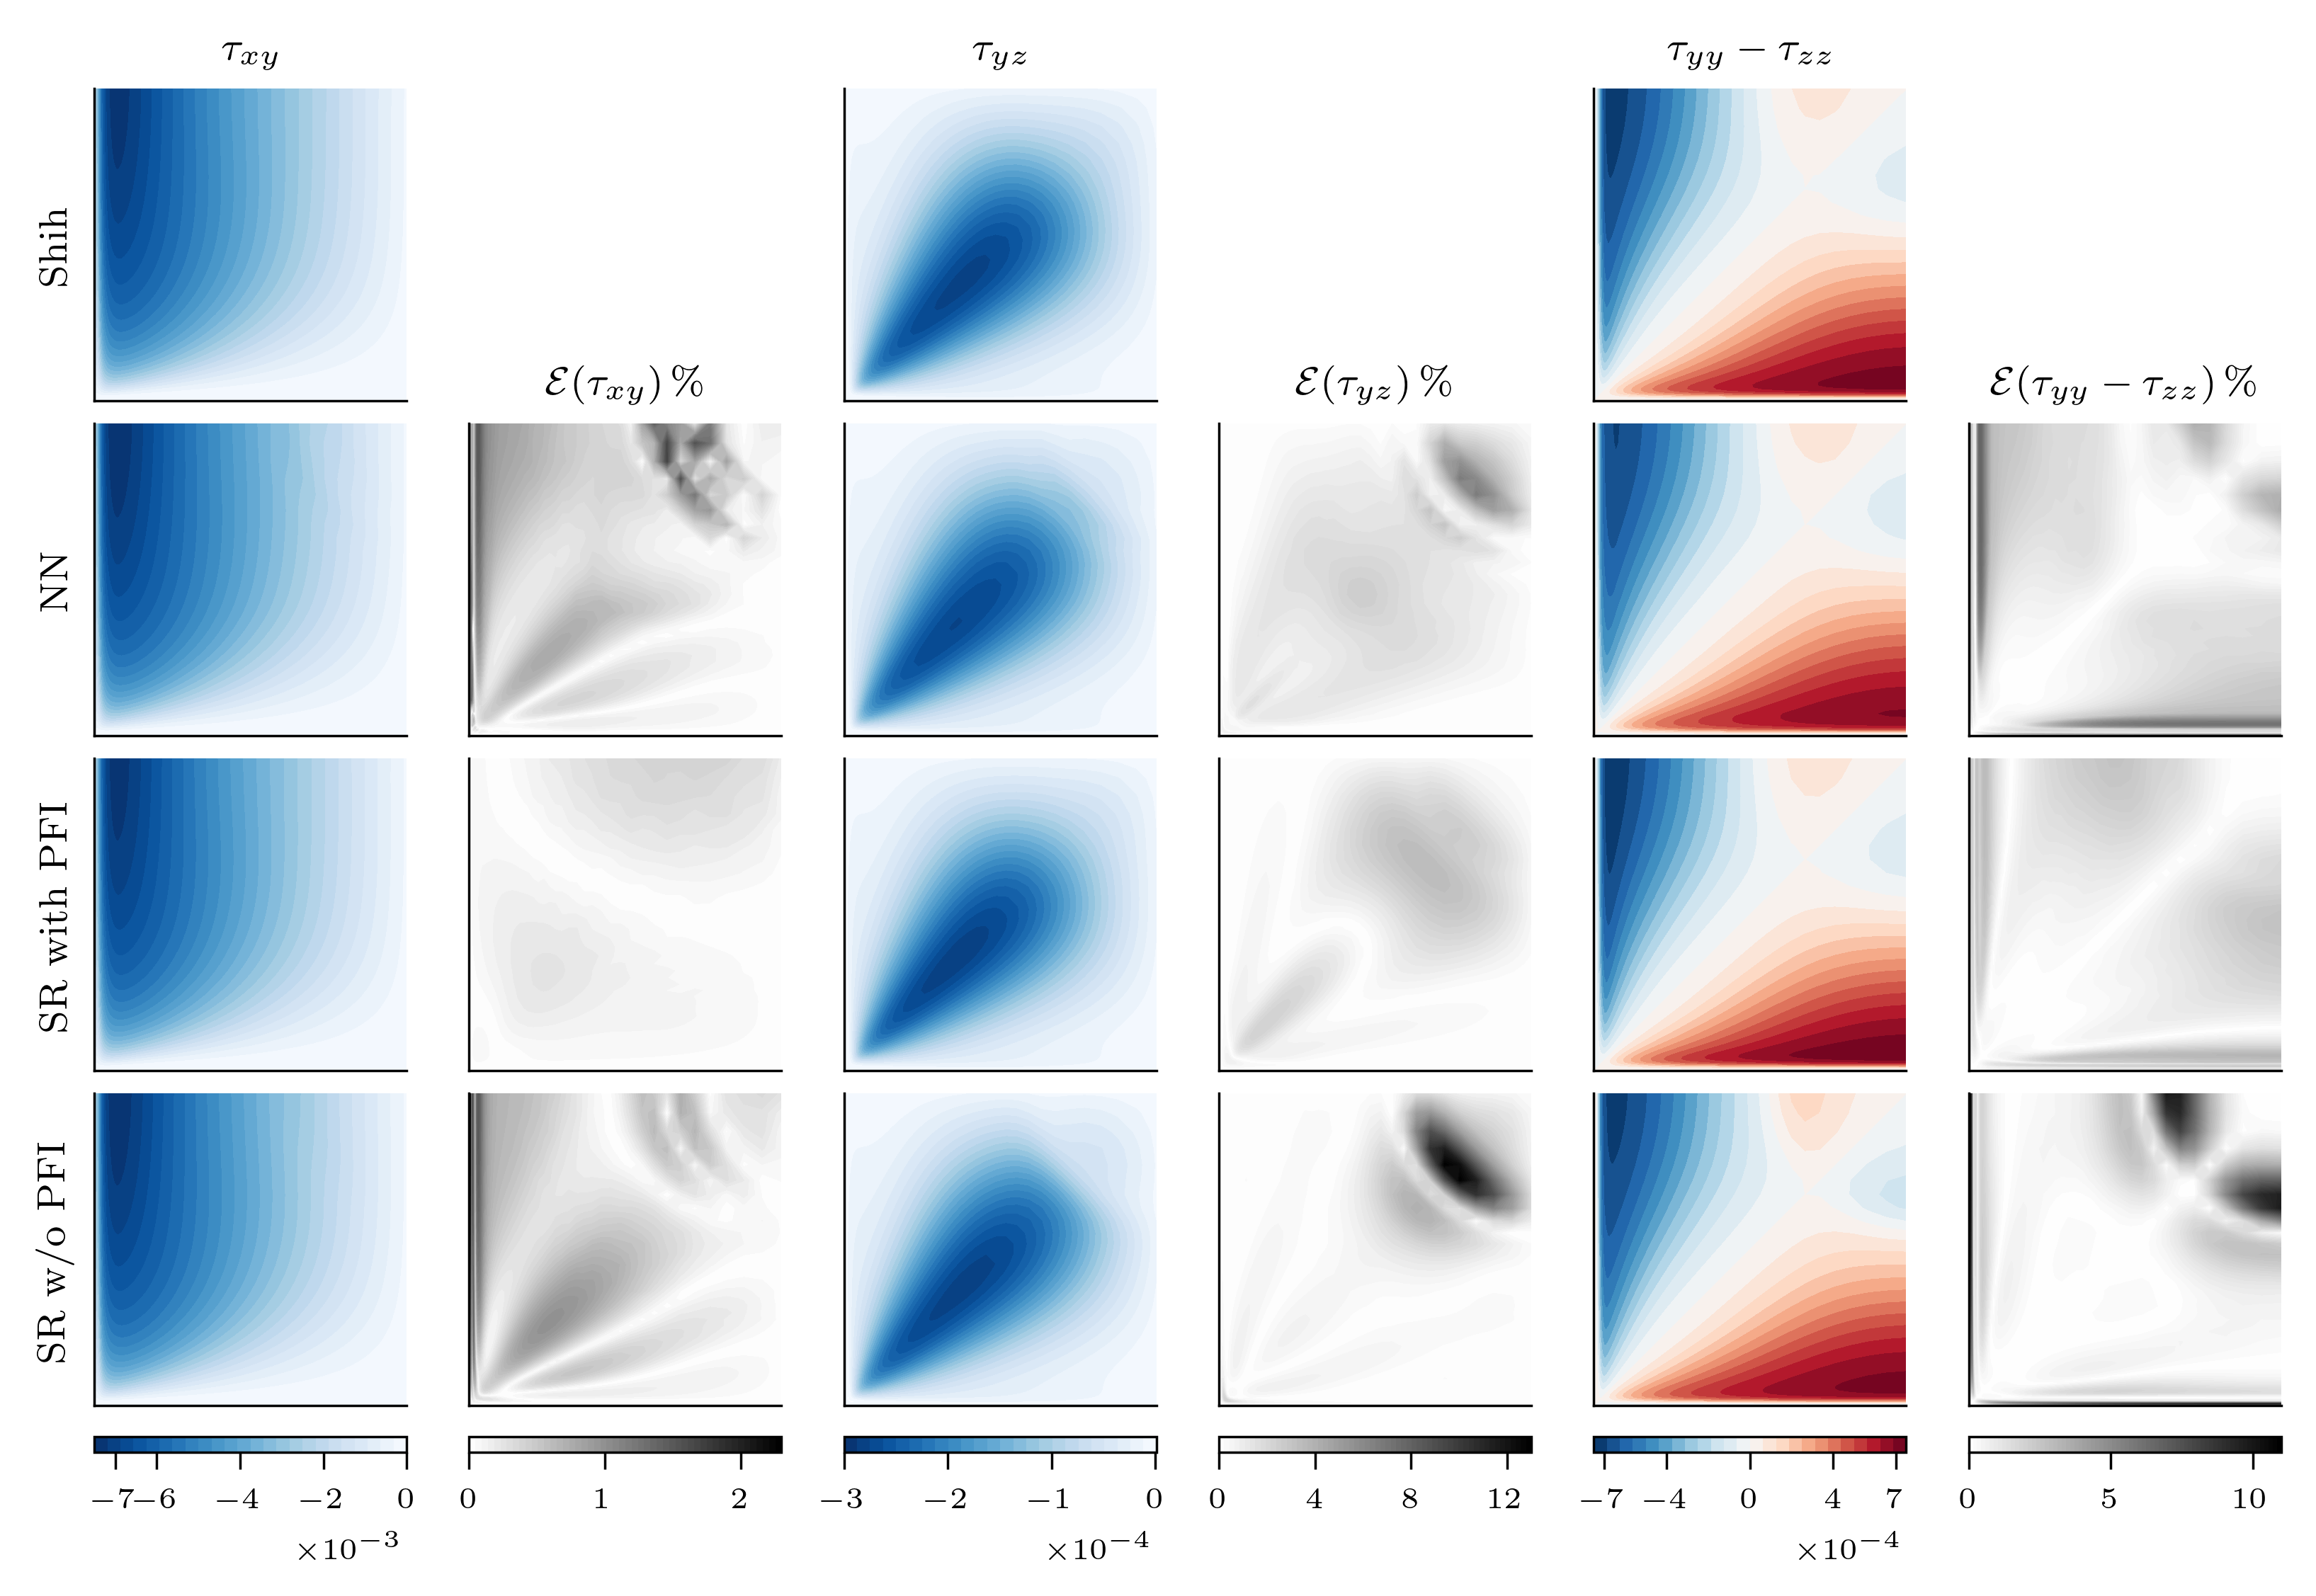

In [226]:
import numpy as np
import os
import fluidfoam as ff
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# function tools #######################################################################


def getReynoldsStress(gradU, g1, g2, g3, g4, tke, timeScale):
    gradU_tran = np.transpose(gradU, (1, 0, 2))
    IM = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    S = timeScale * 0.5 * (gradU + gradU_tran)
    W = timeScale * 0.5 * (gradU - gradU_tran)
    T1 = S
    T2 = np.zeros_like(S)
    T3 = np.zeros_like(S)
    T4 = np.zeros_like(S)
    b = np.zeros_like(S)
    R = np.zeros_like(S)
    for i in range(np.shape(S)[2]):
        T2[:, :, i] = S[:, :, i] @ W[:, :, i] - W[:, :, i] @ S[:, :, i]

        T3[:, :, i] = S[:, :, i] @ S[:, :, i]
        thirdTrace = np.trace(T3[:, :, i]) / 3.0
        T3[:, :, i] -= thirdTrace * IM

        T4[:, :, i] = W[:, :, i] @ W[:, :, i]
        thirdTrace = np.trace(T4[:, :, i]) / 3.0
        T4[:, :, i] -= thirdTrace * IM

    for i in range(np.shape(S)[2]):
        b[:, :, i] = g1[i] * T1[:, :, i] + g2[i] * T2[:, :, i] + g3[
            i] * T3[:, :, i] + g4[i] * T4[:, :, i]
        R[:, :, i] = 2 * tke[i] * b[:, :, i] + tke[i] * 2.0 / 3.0 * IM

    return np.reshape(R, (3, 3, 50, 50), order='F')


# shih_quadratic model: theta > g function
def shih_quadratic(theta):
    nbasis_tensors = 4

    def g1(theta):
        num = -2. / 3.
        denom = 1.25 + np.sqrt(
            2 * theta[:, 0]) + 0.9 * np.sqrt(-2 * theta[:, 1])
        return num / denom

    def g234(theta, coeff):
        return coeff / (1000. + (2 * theta[:, 0])**(3. / 2.))

    g = np.empty([len(theta), nbasis_tensors])
    g[:, 0] = g1(theta)
    for i, c in enumerate([7.5, 1.5, -9.5]):
        g[:, i + 1] = g234(theta, c)
    return g


def _get_b(g, T):
    return np.sum(np.expand_dims(g, 1) * T, axis=-1)


def b2a(b, k):
    return 2 * np.expand_dims(np.squeeze(k), -1) * b


# load data ############################################################################
# Shih
data_dir = '../case-1/input/data'
nscalar_invariants = 2
ncells = 2500
nbasis_tensors = 4
VECTORDIM = 3
theta_t = np.load(os.path.join(
    data_dir, 'scalar_invariants.npy'))[:, :nscalar_invariants]
g_t = shih_quadratic(theta_t)
U_t = np.zeros([ncells, VECTORDIM])
for i, x in enumerate(['x', 'y', 'z']):
    U_t[:, i] = np.loadtxt(os.path.join(data_dir, f'U{x}FullField'))
T_t = np.load(os.path.join(data_dir,
                           'basis_tensors.npy'))[:, :, :nbasis_tensors]
tke_t = np.load(os.path.join(data_dir, 'tke.npy'))
b_t = _get_b(g_t, T_t)
a_t = b2a(b_t, tke_t)
Rxy_Shih = a_t[:, 1].reshape(50, 50, order='F')
Ryz_Shih = a_t[:, 4].reshape(50, 50, order='F')
Ry_z_Shih = (2 * a_t[:, 3] + a_t[:, 0]).reshape(50, 50, order='F')

# NN
caseDir = '../case-1/results_ensemble/sample_50'
x_, y_, z_ = ff.readmesh(caseDir)
y_mesh = np.reshape(y_, (50, 50))
z_mesh = np.reshape(z_, (50, 50))

gradU = ff.readtensor(caseDir, '100', 'grad(U)').reshape(3, 3, -1)
g1 = ff.readscalar(caseDir, '100', 'g1')
g2 = ff.readscalar(caseDir, '100', 'g2')
g3 = ff.readscalar(caseDir, '100', 'g3')
g4 = ff.readscalar(caseDir, '100', 'g4')
tke = ff.readscalar(caseDir, '100', 'k')
timeScale = ff.readscalar(caseDir, '100', 'timeScale')
R_NN = getReynoldsStress(gradU, g1, g2, g3, g4, tke, timeScale)

# SR w PFI
symbDir = '../SR-run/run-2/'
gradU = ff.readtensor(symbDir, '1', 'grad(U)').reshape(3, 3, -1)
g1 = ff.readscalar(symbDir, '1', 'g1')
g2 = ff.readscalar(symbDir, '1', 'g2')
g3 = ff.readscalar(symbDir, '1', 'g3')
g4 = ff.readscalar(symbDir, '1', 'g4')
tke = ff.readscalar(symbDir, '1', 'k')
timeScale = ff.readscalar(symbDir, '1', 'timeScale')
R_SR = getReynoldsStress(gradU, g1, g2, g3, g4, tke, timeScale)

# SR w/o PFI
SR0_Dir = '../SR-Direct-run/run-2/'
gradU = ff.readtensor(SR0_Dir, '1', 'grad(U)').reshape(3, 3, -1)
g1 = ff.readscalar(SR0_Dir, '1', 'g1')
g2 = ff.readscalar(SR0_Dir, '1', 'g2')
g3 = ff.readscalar(SR0_Dir, '1', 'g3')
g4 = ff.readscalar(SR0_Dir, '1', 'g4')
tke = ff.readscalar(SR0_Dir, '1', 'k')
timeScale = ff.readscalar(SR0_Dir, '1', 'timeScale')
R_SR0 = getReynoldsStress(gradU, g1, g2, g3, g4, tke, timeScale)

# error
error_Rxy_NN = np.abs(R_NN[0, 1, :, :] - Rxy_Shih) / np.max(np.abs(Rxy_Shih))
error_Rxy_SR = np.abs(R_SR[0, 1, :, :] - Rxy_Shih) / np.max(np.abs(Rxy_Shih))
error_Rxy_SR0 = np.abs(R_SR0[0, 1, :, :] - Rxy_Shih) / np.max(np.abs(Rxy_Shih))
error_Ryz_NN = np.abs(R_NN[2, 1, :, :] - Ryz_Shih) / np.max(np.abs(Ryz_Shih))
error_Ryz_SR = np.abs(R_SR[2, 1, :, :] - Ryz_Shih) / np.max(np.abs(Ryz_Shih))
error_Ryz_SR0 = np.abs(R_SR0[2, 1, :, :] - Ryz_Shih) / np.max(np.abs(Ryz_Shih))
error_Rdf_NN = np.abs((R_NN[1, 1, :, :] - R_NN[2, 2, :, :]) -
                      Ry_z_Shih) / np.max(np.abs(Ry_z_Shih))
error_Rdf_SR = np.abs((R_SR[1, 1, :, :] - R_SR[2, 2, :, :]) -
                      Ry_z_Shih) / np.max(np.abs(Ry_z_Shih))
error_Rdf_SR0 = np.abs((R_SR0[1, 1, :, :] - R_SR0[2, 2, :, :]) -
                       Ry_z_Shih) / np.max(np.abs(Ry_z_Shih))

# print info
print('Rxy')
print('Shih min max', Rxy_Shih.min(), Rxy_Shih.max())
print('NN   min max', R_NN[0, 1, :, :].min(), R_NN[0, 1, :, :].max())
print('SR   min max', R_SR[0, 1, :, :].min(), R_SR[0, 1, :, :].max())
print('SR0  min max', R_SR0[0, 1, :, :].min(), R_SR0[0, 1, :, :].max())

print('Ryz')
print('Shih min max', Ryz_Shih.min(), Ryz_Shih.max())
print('NN   min max', R_NN[2, 1, :, :].min(), R_NN[2, 1, :, :].max())
print('SR   min max', R_SR[2, 1, :, :].min(), R_SR[2, 1, :, :].max())
print('SR0  min max', R_SR0[2, 1, :, :].min(), R_SR0[2, 1, :, :].max())

print('Ryy-Rzz')
print('Shih min max', Ry_z_Shih.min(), Ry_z_Shih.max())
print('NN   min max', (R_NN[1, 1, :, :] - R_NN[2, 2, :, :]).min(),
      (R_NN[1, 1, :, :] - R_NN[2, 2, :, :]).max())
print('SR   min max', (R_SR[1, 1, :, :] - R_SR[2, 2, :, :]).min(),
      (R_SR[1, 1, :, :] - R_SR[2, 2, :, :]).max())
print('SR0  min max', (R_SR0[1, 1, :, :] - R_SR0[2, 2, :, :]).min(),
      (R_SR0[1, 1, :, :] - R_SR0[2, 2, :, :]).max())

print('Error Rxy')
print('NN  min max', error_Rxy_NN.min(), error_Rxy_NN.max())
print('SR  min max', error_Rxy_SR.min(), error_Rxy_SR.max())
print('SR0 min max', error_Rxy_SR0.min(), error_Rxy_SR0.max())

print('Error Ryz')
print('NN  min max', error_Ryz_NN.min(), error_Ryz_NN.max())
print('SR  min max', error_Ryz_SR.min(), error_Ryz_SR.max())
print('SR0 min max', error_Ryz_SR0.min(), error_Ryz_SR0.max())

print('Error Ryy-Rzz')
print('NN  min max', error_Rdf_NN.min(), error_Rdf_NN.max())
print('SR  min max', error_Rdf_SR.min(), error_Rdf_SR.max())
print('SR0 min max', error_Rdf_SR0.min(), error_Rdf_SR0.max())

# arange grid and subplots #############################################################
fig, ax = plt.subplots(4, 6, figsize=(6.5, 4.4))

# plot ##################################################################################
levels_Rxy = np.linspace(-0.0075, 0, 25)
levels_Ryz = np.linspace(-0.0003, 1.e-6, 25)
levels_Rdf = np.linspace(-0.00075, 0.00075, 25)
levels_e1 = np.linspace(0, 0.023 * 100, 51)
levels_e2 = np.linspace(0, 0.13 * 100, 61)
levels_e3 = np.linspace(0, 0.11 * 100, 75)
# Rxy col
ax00 = ax[0][0].contourf(z_mesh,
                         y_mesh,
                         Rxy_Shih,
                         levels=levels_Rxy,
                         cmap='Blues_r')
ax10 = ax[1][0].contourf(z_mesh,
                         y_mesh,
                         R_NN[0, 1, :, :],
                         levels=levels_Rxy,
                         cmap='Blues_r')
ax20 = ax[2][0].contourf(z_mesh,
                         y_mesh,
                         R_SR[0, 1, :, :],
                         levels=levels_Rxy,
                         cmap='Blues_r')
ax30 = ax[3][0].contourf(z_mesh,
                         y_mesh,
                         R_SR0[0, 1, :, :],
                         levels=levels_Rxy,
                         cmap='Blues_r')

# Error Rxy col
ax11 = ax[1][1].contourf(z_mesh,
                         y_mesh,
                         error_Rxy_NN * 1.e2,
                         levels=levels_e1,
                         cmap='gray_r')
ax21 = ax[2][1].contourf(z_mesh,
                         y_mesh,
                         error_Rxy_SR * 1.e2,
                         levels=levels_e1,
                         cmap='gray_r')
ax31 = ax[3][1].contourf(z_mesh,
                         y_mesh,
                         error_Rxy_SR0 * 1.e2,
                         levels=levels_e1,
                         cmap='gray_r')

# Ryz col
ax02 = ax[0][2].contourf(z_mesh,
                         y_mesh,
                         Ryz_Shih,
                         levels=levels_Ryz,
                         cmap='Blues_r')
ax12 = ax[1][2].contourf(z_mesh,
                         y_mesh,
                         R_NN[2, 1, :, :],
                         levels=levels_Ryz,
                         cmap='Blues_r')
ax22 = ax[2][2].contourf(z_mesh,
                         y_mesh,
                         R_SR[2, 1, :, :],
                         levels=levels_Ryz,
                         cmap='Blues_r')
ax32 = ax[3][2].contourf(z_mesh,
                         y_mesh,
                         R_SR0[2, 1, :, :],
                         levels=levels_Ryz,
                         cmap='Blues_r')

# Error Ryz
ax13 = ax[1][3].contourf(z_mesh,
                         y_mesh,
                         error_Ryz_NN * 1.e2,
                         levels=levels_e2,
                         cmap='gray_r')
ax23 = ax[2][3].contourf(z_mesh,
                         y_mesh,
                         error_Ryz_SR * 1.e2,
                         levels=levels_e2,
                         cmap='gray_r')
ax33 = ax[3][3].contourf(z_mesh,
                         y_mesh,
                         error_Ryz_SR0 * 1.e2,
                         levels=levels_e2,
                         cmap='gray_r')

# Ryy-Rzz col
ax04 = ax[0][4].contourf(z_mesh,
                         y_mesh,
                         Ry_z_Shih,
                         levels=levels_Rdf,
                         cmap='RdBu_r')
ax14 = ax[1][4].contourf(z_mesh,
                         y_mesh,
                         R_NN[1, 1, :, :] - R_NN[2, 2, :, :],
                         levels=levels_Rdf,
                         cmap='RdBu_r')
ax24 = ax[2][4].contourf(z_mesh,
                         y_mesh,
                         R_SR[1, 1, :, :] - R_SR[2, 2, :, :],
                         levels=levels_Rdf,
                         cmap='RdBu_r')
ax34 = ax[3][4].contourf(z_mesh,
                         y_mesh,
                         R_SR0[1, 1, :, :] - R_SR0[2, 2, :, :],
                         levels=levels_Rdf,
                         cmap='RdBu_r')

# Error Ryy-Rzz col
ax15 = ax[1][5].contourf(z_mesh,
                         y_mesh,
                         error_Rdf_NN * 1.e2,
                         levels=levels_e3,
                         cmap='gray_r')
ax25 = ax[2][5].contourf(z_mesh,
                         y_mesh,
                         error_Rdf_SR * 1.e2,
                         levels=levels_e3,
                         cmap='gray_r')
ax35 = ax[3][5].contourf(z_mesh,
                         y_mesh,
                         error_Rdf_SR0 * 1.e2,
                         levels=levels_e3,
                         cmap='gray_r')

# set ###################################################################################
plt.subplots_adjust(left=0.025, right=0.975, bottom=0.1, top=0.95, hspace=0.05)
for i in range(4):
    for j in range(6):
        ax[i][j].set(aspect='equal', xticks=([]), yticks=([]))
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)
for i in [1, 3, 5]:
    ax[0][i].spines[['bottom', 'left']].set_visible(False)

ax[0][0].set(title=r'$\tau_{xy}$')
ax[0][2].set(title=r'$\tau_{yz}$')
ax[0][4].set(title=r'$\tau_{yy}-\tau_{zz}$')
ax[1][1].set(title=r'$\mathcal{E}(\tau_{xy})\,\%$')
ax[1][3].set(title=r'$\mathcal{E}(\tau_{yz})\,\%$')
ax[1][5].set(title=r'$\mathcal{E}(\tau_{yy}-\tau_{zz})\,\%$')
ax[0][0].set(ylabel=r'Shih')
ax[1][0].set(ylabel=r'NN')
ax[2][0].set(ylabel=r'SR with PFI')
ax[3][0].set(ylabel=r'SR w/o PFI')

# cbar ###########################################################################
# cbar Rxy
ax30_pos = ax[3][0].get_position()
cb_a30_ax = fig.add_axes(
    [ax30_pos.x0, ax30_pos.y0 - 0.03, ax30_pos.x1 - ax30_pos.x0, 0.01])
cb_a30 = plt.colorbar(ax30, cax=cb_a30_ax, orientation='horizontal')
cb_a30.ax.set_xticks([-0.007, -0.006, -0.004, -0.002, 0])
cb_a30.ax.tick_params(axis='x', direction='out')
cb_a30.ax.ticklabel_format(style='sci', scilimits=(0, 0))

# cbar Ryz
ax32_pos = ax[3][2].get_position()
cb_a32_ax = fig.add_axes(
    [ax32_pos.x0, ax32_pos.y0 - 0.03, ax32_pos.x1 - ax32_pos.x0, 0.01])
cb_a32 = plt.colorbar(ax32, cax=cb_a32_ax, orientation='horizontal')
cb_a32.ax.set_xticks([-0.0003, -0.0002, -0.0001, 0])
cb_a32.ax.tick_params(axis='x', direction='out')
cb_a32.ax.ticklabel_format(style='sci', scilimits=(0, 0))

# cbar Rdf
ax34_pos = ax[3][4].get_position()
cb_a34_ax = fig.add_axes(
    [ax34_pos.x0, ax34_pos.y0 - 0.03, ax34_pos.x1 - ax34_pos.x0, 0.01])
cb_a34 = plt.colorbar(ax34, cax=cb_a34_ax, orientation='horizontal')
cb_a34.ax.set_xticks([-0.0007, -0.0004, 0, 0.0004, 0.0007])
cb_a34.ax.tick_params(axis='x', direction='out')
cb_a34.ax.ticklabel_format(style='sci', scilimits=(0, 0))

# cbar Error Rxy
ax31_pos = ax[3][1].get_position()
cb_a31_ax = fig.add_axes(
    [ax31_pos.x0, ax31_pos.y0 - 0.03, ax31_pos.x1 - ax31_pos.x0, 0.01])
cb_a31 = plt.colorbar(ax31, cax=cb_a31_ax, orientation='horizontal')
cb_a31.ax.set_xticks([0, 1, 2])
cb_a31.ax.tick_params(axis='x', direction='out')
cb_a31.ax.ticklabel_format(style='sci', scilimits=(0, 0))

# cbar Error Rxy
ax33_pos = ax[3][3].get_position()
cb_a33_ax = fig.add_axes(
    [ax33_pos.x0, ax33_pos.y0 - 0.03, ax33_pos.x1 - ax33_pos.x0, 0.01])
cb_a33 = plt.colorbar(ax33, cax=cb_a33_ax, orientation='horizontal')
cb_a33.ax.set_xticks([0, 4, 8, 12])
cb_a33.ax.tick_params(axis='x', direction='out')
cb_a33.ax.ticklabel_format(style='sci', scilimits=(0, 2))

# cbar Error Rxy
ax35_pos = ax[3][5].get_position()
cb_a35_ax = fig.add_axes(
    [ax35_pos.x0, ax35_pos.y0 - 0.03, ax35_pos.x1 - ax35_pos.x0, 0.01])
cb_a35 = plt.colorbar(ax35, cax=cb_a35_ax, orientation='horizontal')
cb_a35.ax.set_xticks([0, 5, 10])
cb_a35.ax.tick_params(axis='x', direction='out')
cb_a35.ax.ticklabel_format(style='sci', scilimits=(0, 2))

plt.savefig('duct-flow-R-new.png')

In [ ]:
###################################################################
# plot Reynolds stress
import numpy as np
import os
import fluidfoam as ff
import matplotlib.pyplot as plt


def getReynoldsStress(gradU, g1, g2, g3, g4, tke, timeScale):
    gradU_tran = np.transpose(gradU, (1, 0, 2))
    IM = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    S = timeScale * 0.5 * (gradU + gradU_tran)
    W = timeScale * 0.5 * (gradU - gradU_tran)
    T1 = S
    T2 = np.zeros_like(S)
    T3 = np.zeros_like(S)
    T4 = np.zeros_like(S)
    b = np.zeros_like(S)
    R = np.zeros_like(S)
    for i in range(np.shape(S)[2]):
        T2[:, :, i] = S[:, :, i] @ W[:, :, i] - W[:, :, i] @ S[:, :, i]

        T3[:, :, i] = S[:, :, i] @ S[:, :, i]
        thirdTrace = np.trace(T3[:, :, i]) / 3.0
        T3[:, :, i] -= thirdTrace * IM

        T4[:, :, i] = W[:, :, i] @ W[:, :, i]
        thirdTrace = np.trace(T4[:, :, i]) / 3.0
        T4[:, :, i] -= thirdTrace * IM

    for i in range(np.shape(S)[2]):
        b[:, :, i] = g1[i] * T1[:, :, i] + g2[i] * T2[:, :, i] + g3[
            i] * T3[:, :, i] + g4[i] * T4[:, :, i]
        R[:, :, i] = 2 * tke[i] * b[:, :, i] + tke[i] * 2.0 / 3.0 * IM

    return np.reshape(R, (3, 3, 50, 50), order='F')


# shih_quadratic model: theta > g function
def shih_quadratic(theta):
    nbasis_tensors = 4

    def g1(theta):
        num = -2. / 3.
        denom = 1.25 + np.sqrt(
            2 * theta[:, 0]) + 0.9 * np.sqrt(-2 * theta[:, 1])
        return num / denom

    def g234(theta, coeff):
        return coeff / (1000. + (2 * theta[:, 0])**(3. / 2.))

    g = np.empty([len(theta), nbasis_tensors])
    g[:, 0] = g1(theta)
    for i, c in enumerate([7.5, 1.5, -9.5]):
        g[:, i + 1] = g234(theta, c)
    return g


def _get_b(g, T):
    return np.sum(np.expand_dims(g, 1) * T, axis=-1)


def b2a(b, k):
    return 2 * np.expand_dims(np.squeeze(k), -1) * b


# load data
caseDir = '../case-1/results_ensemble/sample_50'
x_, y_, z_ = ff.readmesh(caseDir)
y_mesh = np.reshape(y_, (50, 50))
z_mesh = np.reshape(z_, (50, 50))

gradU = ff.readtensor(caseDir, '100', 'grad(U)').reshape(3, 3, -1)
g1 = ff.readscalar(caseDir, '100', 'g1')
g2 = ff.readscalar(caseDir, '100', 'g2')
g3 = ff.readscalar(caseDir, '100', 'g3')
g4 = ff.readscalar(caseDir, '100', 'g4')
tke = ff.readscalar(caseDir, '100', 'k')
timeScale = ff.readscalar(caseDir, '100', 'timeScale')
R_learned = getReynoldsStress(gradU, g1, g2, g3, g4, tke, timeScale)

data_dir = '../case-1/input/data'
nscalar_invariants = 2
ncells = 2500
nbasis_tensors = 4
VECTORDIM = 3
theta_t = np.load(os.path.join(
    data_dir, 'scalar_invariants.npy'))[:, :nscalar_invariants]
g_t = shih_quadratic(theta_t)
U_t = np.zeros([ncells, VECTORDIM])
for i, x in enumerate(['x', 'y', 'z']):
    U_t[:, i] = np.loadtxt(os.path.join(data_dir, f'U{x}FullField'))
T_t = np.load(os.path.join(data_dir,
                           'basis_tensors.npy'))[:, :, :nbasis_tensors]
tke_t = np.load(os.path.join(data_dir, 'tke.npy'))
b_t = _get_b(g_t, T_t)
a_t = b2a(b_t, tke_t)
Rxy_base = a_t[:, 1].reshape(50, 50, order='F')
Ryz_base = a_t[:, 4].reshape(50, 50, order='F')
Ry_z_base = (2 * a_t[:, 3] + a_t[:, 0]).reshape(50, 50, order='F')
print(np.shape(a_t))

print('Rxy      min max (Shih)', a_t[:, 1].min(), a_t[:, 1].max())
print('Ryz      min max (Shih)', a_t[:, 4].min(), a_t[:, 4].max())
print('Ryy-Rzz  min max (Shih)', (2 * a_t[:, 3] + a_t[:, 0]).min(),
      (2 * a_t[:, 3] + a_t[:, 0]).max())

print('Rxy      min max (learned)', R_learned[0, 1, :].min(),
      R_learned[0, 1, :].max())
print('Ryz      min max (learned)', R_learned[1, 2, :].min(),
      R_learned[1, 2, :].max())
print(
    'Ryy-Rzz  min max (learned)',
    (R_learned[1, 1, :] - R_learned[2, 2, :]).min(),
    (R_learned[1, 1, :] - R_learned[2, 2, :]).max(),
)

error_xy = np.abs(Rxy_base - R_learned[0, 1, :, :]) / np.max(np.abs(Rxy_base))
error_yz = np.abs(Ryz_base - R_learned[2, 1, :, :]) / np.max(np.abs(Ryz_base))
error_y_z = np.abs(Ry_z_base -
                   (R_learned[1, 1, :, :] - R_learned[2, 2, :, :])) / np.max(
                       np.abs(Ry_z_base))
print('Rxy      error min max', error_xy.min(), error_xy.max())
print('Ryz      error min max', error_yz.min(), error_yz.max())
print('Ryy-Rzz  error min max', error_y_z.min(), error_y_z.max())

fig, ax = plt.subplots(3, 3, figsize=(6, 5))
levels_Rxy = np.linspace(-0.0075, 0, 21)
levels_Ryz = np.linspace(-0.0003, 0, 21)
levels_Rdf = np.linspace(-0.00075, 0.00075, 21)
levels_e1 = np.linspace(0, 0.02 * 100, 51)
levels_e2 = np.linspace(0, 0.0665 * 100, 61)
levels_e3 = np.linspace(0, 0.075 * 100, 75)
a00 = ax[0][0].contourf(z_mesh, y_mesh, Rxy_base, levels=levels_Rxy)  # Rxy
a10 = ax[1][0].contourf(z_mesh, y_mesh, Ryz_base, levels=levels_Ryz)  # Ryz
a20 = ax[2][0].contourf(z_mesh,
                        y_mesh,
                        Ry_z_base,
                        levels=levels_Rdf,
                        cmap='RdBu_r')  # Ryy-Rzz

a01 = ax[0][1].contourf(z_mesh,
                        y_mesh,
                        R_learned[0, 1, :, :],
                        levels=levels_Rxy)  # Rxy
a11 = ax[1][1].contourf(z_mesh,
                        y_mesh,
                        R_learned[2, 1, :, :],
                        levels=levels_Ryz)  # Ryz
a21 = ax[2][1].contourf(z_mesh,
                        y_mesh,
                        R_learned[1, 1, :, :] - R_learned[2, 2, :, :],
                        levels=levels_Rdf,
                        cmap='RdBu_r')  # Ryy-Rzz

a02 = ax[0][2].contourf(z_mesh,
                        y_mesh,
                        error_xy * 100,
                        levels=levels_e1,
                        cmap='gray_r')
a12 = ax[1][2].contourf(z_mesh,
                        y_mesh,
                        error_yz * 100,
                        levels=levels_e2,
                        cmap='gray_r')
a22 = ax[2][2].contourf(z_mesh,
                        y_mesh,
                        error_y_z * 100,
                        levels=levels_e3,
                        cmap='gray_r')

for i in range(3):
    for j in range(3):
        ax[i][j].set(aspect='equal', xticks=([]), yticks=([]))
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)
ax[0][0].set(title=r'$\tau_{xy}$, Shih model')
ax[1][0].set(title=r'$\tau_{yz}$, Shih model')
ax[2][0].set(title=r'$\tau_{yy}-\tau_{zz}$, Shih model')
ax[0][1].set(title=r'$\tau_{xy}$, EnKF learned')
ax[1][1].set(title=r'$\tau_{yz}$, EnKF learned')
ax[2][1].set(title=r'$\tau_{yy}-\tau_{zz}$, EnKF learned')
ax[0][2].set(title=r'$\mathcal{E}(\tau_{xy})$ (%)')
ax[1][2].set(title=r'$\mathcal{E}(\tau_{yz})$ (%)')
ax[2][2].set(title=r'$\mathcal{E}(\tau_{yy}-\tau_{zz})$ (%)')
plt.subplots_adjust(left=0.12, right=0.85, wspace=0.1, bottom=0.02, top=0.95)

# colorbar
# colorbar 1
ax00_pos = ax[0][0].get_position()
cb1_ax = fig.add_axes(
    [ax00_pos.x0 - 0.04, ax00_pos.y0, 0.02, ax00_pos.y1 - ax00_pos.y0])
cb1 = plt.colorbar(a00, cax=cb1_ax, orientation='vertical')
cb1.ax.set_yticks([-0.007, -0.005, 0])
cb1.ax.tick_params(axis='y',
                   direction='out',
                   left=True,
                   right=False,
                   labelleft=True,
                   labelright=False)
cb1.ax.ticklabel_format(style='sci', scilimits=(0, 0))

# colorbar 2
ax10_pos = ax[1][0].get_position()
cb2_ax = fig.add_axes(
    [ax10_pos.x0 - 0.04, ax10_pos.y0, 0.02, ax10_pos.y1 - ax10_pos.y0])
cb2 = plt.colorbar(a10, cax=cb2_ax, orientation='vertical')
cb2.ax.set_yticks([-0.0003, -0.0002, -0.0001, 0])
cb2.ax.tick_params(axis='y',
                   direction='out',
                   left=True,
                   right=False,
                   labelleft=True,
                   labelright=False)
cb2.ax.ticklabel_format(style='sci', scilimits=(0, 0))

# colorbar 3
ax20_pos = ax[2][0].get_position()
cb3_ax = fig.add_axes(
    [ax20_pos.x0 - 0.04, ax20_pos.y0, 0.02, ax20_pos.y1 - ax20_pos.y0])
cb3 = plt.colorbar(a20, cax=cb3_ax, orientation='vertical')
cb3.ax.set_yticks([-0.0007, 0, 0.0007])
cb3.ax.tick_params(axis='y',
                   direction='out',
                   left=True,
                   right=False,
                   labelleft=True,
                   labelright=False)
cb3.ax.ticklabel_format(style='sci', scilimits=(0, 0))

# colorbar 4
ax02_pos = ax[0][2].get_position()
cb4_ax = fig.add_axes(
    [ax02_pos.x1 + 0.02, ax02_pos.y0, 0.02, ax02_pos.y1 - ax02_pos.y0])
cb4 = plt.colorbar(a02, cax=cb4_ax, orientation='vertical')
cb4.ax.set_yticks([0, 1, 2])
cb4.ax.tick_params(axis='y', direction='out')
cb4.ax.ticklabel_format(style='sci', scilimits=(0, 0))

# colorbar 5
ax12_pos = ax[1][2].get_position()
cb5_ax = fig.add_axes(
    [ax12_pos.x1 + 0.02, ax12_pos.y0, 0.02, ax12_pos.y1 - ax12_pos.y0])
cb5 = plt.colorbar(a12, cax=cb5_ax, orientation='vertical')
cb5.ax.set_yticks([0, 3, 6])
cb5.ax.tick_params(axis='y', direction='out')
cb5.ax.ticklabel_format(style='sci', scilimits=(0, 0))

# colorbar 6
ax22_pos = ax[2][2].get_position()
cb6_ax = fig.add_axes(
    [ax22_pos.x1 + 0.02, ax22_pos.y0, 0.02, ax22_pos.y1 - ax22_pos.y0])
cb6 = plt.colorbar(a22, cax=cb6_ax, orientation='vertical')
cb6.ax.set_yticks([0, 4, 7])
cb6.ax.tick_params(axis='y', direction='out')
cb6.ax.ticklabel_format(style='sci', scilimits=(0, 0))

plt.savefig('DuctFlow-Reynolds-stress-compare.png')
